In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer


In [1]:
%pip install openpyxl



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\JPP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


IMPORT DATASET


In [3]:
demo = pd.read_excel(r"Telco_customer_churn_demographics.xlsx")
demo

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2


In [4]:
location = pd.read_excel(r"Telco_customer_churn_location.xlsx")
location

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330


In [5]:
Pop = pd.read_excel(r"Telco_customer_churn_population.xlsx")
Pop

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019
...,...,...,...
1666,1667,96145,4002
1667,1668,96146,942
1668,1669,96148,678
1669,1670,96150,33038


In [6]:
Services = pd.read_excel(r"Telco_customer_churn_services.xlsx")
Services 

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,No,0,72,NaN,Yes,22.77,No,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,1,Q3,Yes,4,72,NaN,Yes,29.66,Yes,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,1,Q3,Yes,1,11,NaN,No,0.00,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [7]:
Status = pd.read_excel(r"Telco_customer_churn_status.xlsx")
Status

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN


MERGE TABLES (DEMOGRAPHIC, LOCATION, SERVICES AND STATUS)

In [8]:

df = demo.merge(location, on='Customer ID', how='inner', suffixes=('_demo', '_location'))
df = df.merge(Pop, on='Zip Code', how='inner')
df = df.merge(Status, on='Customer ID', how='inner', suffixes=('_merged', '_status'))
df = df.merge(Services, on='Customer ID', how='inner', suffixes=('_merged', '_services'))


SET INDEX


In [9]:
df.set_index('Customer ID', inplace = True)
df

,Count_demo,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_location,Country,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Customer ID,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,United States,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65
4737-AQCPU,1,Male,39,No,No,Yes,No,0,1,United States,...,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25
5043-TRZWM,1,Female,32,No,No,No,No,0,1,United States,...,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66
8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,1,United States,...,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40
9979-RGMZT,1,Female,20,Yes,No,No,No,0,1,United States,...,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,1,United States,...,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.0,0,16.06,69.61
0795-GMVQO,1,Male,36,No,No,Yes,No,0,1,United States,...,Yes,One Year,No,Credit Card,109.90,7332.40,0.0,0,1549.71,8882.11
9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,1,United States,...,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.0,0,210.78,1108.53


In [10]:
df.columns

Index(['Count_demo', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Count_location', 'Country',
       'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'ID',
       'Population', 'Count_merged', 'Quarter_merged', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason', 'Count_services', 'Quarter_services',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total

CHECK DUPLICATES

In [11]:
df[df.duplicated()]

,Count_demo,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_location,Country,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Customer ID,,,,,,,,,,,,,,,,,,,,,


DATA EXPLORATION

In [12]:
missing_values = df.isna().sum()
variables_with_missing = missing_values[missing_values > 0]
print(variables_with_missing)

Churn Category    5174
Churn Reason      5174
Offer             3877
Internet Type     1526
dtype: int64


In [13]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [14]:
df['Internet Type'].value_counts()

Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [15]:
df['Offer'].value_counts()

Offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64

In [16]:

df['Internet Type'].fillna('No', inplace = True)

In [17]:
df['Internet Type'].value_counts()

Internet Type
Fiber Optic    3035
DSL            1652
No             1526
Cable           830
Name: count, dtype: int64

In [18]:
df['Offer'].fillna('None', inplace = True)

In [19]:
df['Offer'].value_counts()

Offer
None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64

In [20]:
missing_values = df.isna().sum()
variables_with_missing = missing_values[missing_values > 0]
print(variables_with_missing)

Churn Category    5174
Churn Reason      5174
dtype: int64


In [21]:
df.shape

(7043, 57)

In [22]:
#check which columns are duplicated when merged the different tables
all_columns = df.columns
column_dict = {}

for column in all_columns:
    
    column_name_without_suffix = column.rsplit('_', 1)[0]
    
    
    if column_name_without_suffix not in column_dict:
        column_dict[column_name_without_suffix] = []
    column_dict[column_name_without_suffix].append(column)


columns_with_suffixes = {k: v for k, v in column_dict.items() if len(v) > 1}


for column_name, column_list in columns_with_suffixes.items():
    print(f"Columns with the name '{column_name}' but different suffixes:")
    for column in column_list:
        print(f"  - {column}")


Columns with the name 'Count' but different suffixes:
  - Count_demo
  - Count_location
  - Count_merged
  - Count_services
Columns with the name 'Quarter' but different suffixes:
  - Quarter_merged
  - Quarter_services


In [23]:
#delete duplicate columns
columns_to_keep = ['Count_demo', 'Quarter_merged'] + [col for col in df.columns if not col.startswith('Count_') and not col.startswith('Quarter_')]

df = df[columns_to_keep]


In [24]:
# Rename the columns
df = df.rename(columns={'Count_demo': 'Count', 'Quarter_merged': 'Quarter'})


In [25]:
df.shape

(7043, 53)

In [26]:
df.columns

Index(['Count', 'Quarter', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Country', 'State',
       'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'ID',
       'Population', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Count                              7043 non-null   int64  
 1   Quarter                            7043 non-null   object 
 2   Gender                             7043 non-null   object 
 3   Age                                7043 non-null   int64  
 4   Under 30                           7043 non-null   object 
 5   Senior Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Number of Dependents               7043 non-null   int64  
 9   Country                            7043 non-null   object 
 10  State                              7043 non-null   object 
 11  City                               7043 non-nu

CATEGORICAL VARIABLES

In [28]:
df.describe(include = ['O'])

,Quarter,Gender,Under 30,Senior Citizen,Married,Dependents,Country,State,City,Lat Long,...,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,1,2,2,2,2,2,1,1,1106,1679,...,2,2,2,2,2,2,2,3,2,3
top,Q3,Male,No,No,No,No,United States,California,Los Angeles,"33.362575, -117.299644",...,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
freq,7043,3555,5642,5901,3641,5416,7043,7043,293,43,...,4614,4621,4999,4336,4311,4555,4745,3610,4171,3909


In [29]:

colunas = df.columns

variaveis_com_um_tipo = []

for coluna in colunas:

    valores_unicos = df[coluna].unique()
    
    
    if len(valores_unicos) == 1:
        variaveis_com_um_tipo.append(coluna)


print(variaveis_com_um_tipo)


['Count', 'Quarter', 'Country', 'State']


In [30]:
# Quarter column has just the value Q3
unique_quarters = df['Quarter'].unique()
print(unique_quarters)


['Q3']


In [31]:
#conclusions:
# There is just one quarter (Q3), one country (USA), one state (California), it does not make sense to keep these variables.

In [32]:
columns_to_drop = ['Quarter', 'Country', 'State']
df = df.drop(columns=columns_to_drop)


In [33]:
df.shape

(7043, 50)

NUMERICAL VARIABLES


In [34]:
df.describe()

,Count,Age,Number of Dependents,Zip Code,Latitude,Longitude,ID,Population,Satisfaction Score,Churn Value,...,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,46.509726,0.468692,93486.070567,36.197455,-119.756684,784.800653,22139.603294,3.244924,0.265370,...,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,16.750352,0.962802,1856.767505,2.468929,2.154425,489.044050,21152.392837,1.201657,0.441561,...,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,19.000000,0.000000,90001.000000,32.555828,-124.301372,1.000000,11.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,32.000000,0.000000,92101.000000,33.990646,-121.788090,353.000000,2344.000000,3.000000,0.000000,...,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,46.000000,0.000000,93518.000000,36.205465,-119.595293,759.000000,17554.000000,3.000000,0.000000,...,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,60.000000,0.000000,95329.000000,38.161321,-117.969795,1208.000000,36125.000000,4.000000,1.000000,...,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,80.000000,9.000000,96150.000000,41.962127,-114.192901,1670.000000,105285.000000,5.000000,1.000000,...,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [35]:
df['ID'].value_counts()

ID
328    43
327    38
373    36
368    34
376    32
       ..
764     2
303     2
357     2
404     2
851     1
Name: count, Length: 1626, dtype: int64

In [36]:
df['Zip Code'].value_counts()

Zip Code
92028    43
92027    38
92122    36
92117    34
92126    32
         ..
93528     2
91934     2
92105     2
92250     2
93711     1
Name: count, Length: 1626, dtype: int64

In [37]:
columns_to_drop = ['ID']
df = df.drop(columns=columns_to_drop)

In [38]:
df.shape

(7043, 49)

In [39]:
df.columns

Index(['Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Population', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Count                              7043 non-null   int64  
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   City                               7043 non-null   object 
 9   Zip Code                           7043 non-null   int64  
 10  Lat Long                           7043 non-null   object 
 11  Latitude                           7043 non-nu

<Axes: >

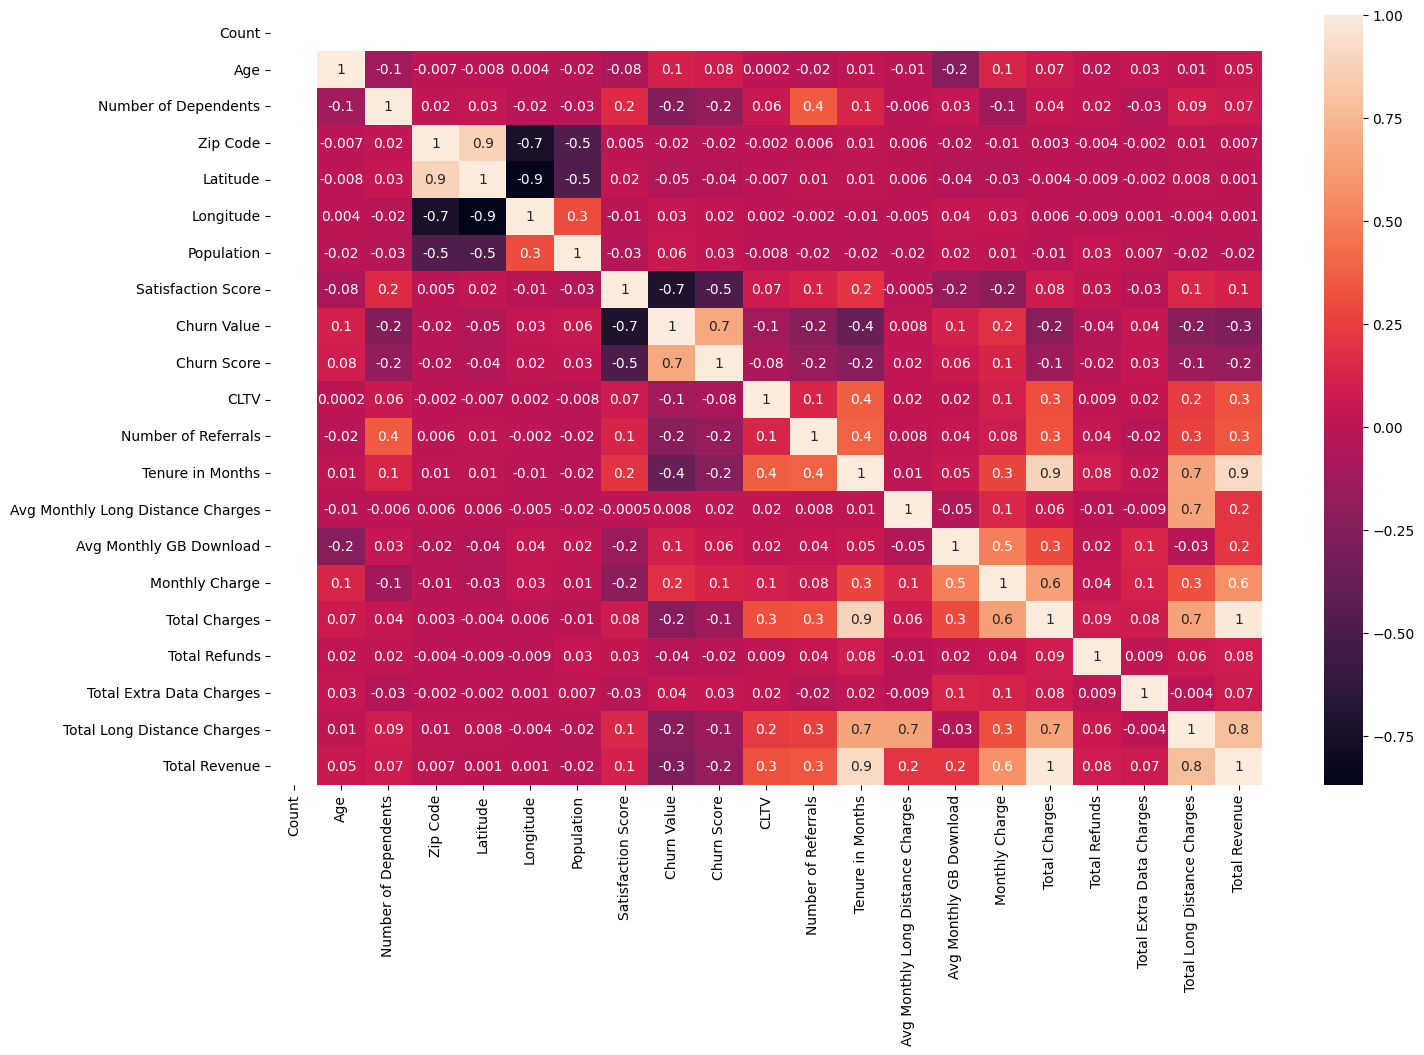

In [41]:
# Calculate the correlation matrix 
df_corr = df.select_dtypes(include=['number']).corr(method='spearman')
figure = plt.figure(figsize=(16, 10))
sns.heatmap(df_corr, annot=True, fmt='.1g')


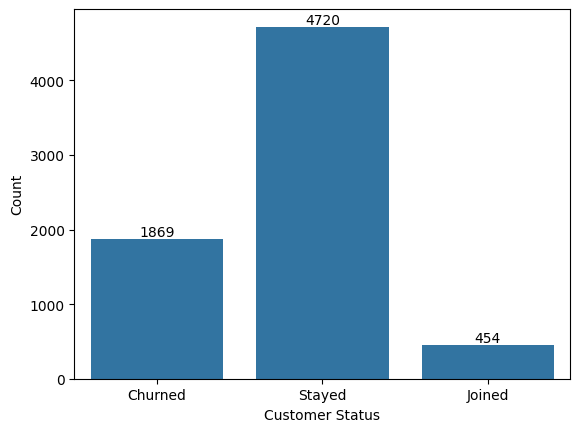

In [42]:
ax = sns.countplot(x='Customer Status', data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Customer Status')
plt.ylabel('Count')


plt.show()


In [43]:
df['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [44]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [45]:
cross_table = pd.crosstab(df['Satisfaction Score'], df['Customer Status'])

print(cross_table)

Customer Status     Churned  Joined  Stayed
Satisfaction Score                         
1                       922       0       0
2                       518       0       0
3                       429     157    2079
4                         0     152    1637
5                         0     145    1004


In [46]:
cross_table = pd.crosstab(df['Satisfaction Score'], df['Customer Status'], normalize='columns') * 100
print(cross_table)


Customer Status       Churned     Joined     Stayed
Satisfaction Score                                 
1                   49.331193   0.000000   0.000000
2                   27.715356   0.000000   0.000000
3                   22.953451  34.581498  44.046610
4                    0.000000  33.480176  34.682203
5                    0.000000  31.938326  21.271186


In [47]:
intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
categorias = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Creation of a new variable 'Churn Score Category'
df['Churn Score Category'] = pd.cut(df['Churn Score'], bins=intervalos, labels=categorias)
print(df)

             Count  Gender  Age Under 30 Senior Citizen Married Dependents  \
Customer ID                                                                  
8779-QRDMV       1    Male   78       No            Yes      No         No   
4737-AQCPU       1    Male   39       No             No     Yes         No   
5043-TRZWM       1  Female   32       No             No      No         No   
8165-CBKXO       1    Male   35       No             No     Yes        Yes   
9979-RGMZT       1  Female   20      Yes             No      No         No   
...            ...     ...  ...      ...            ...     ...        ...   
9108-EJFJP       1  Female   21      Yes             No     Yes         No   
0795-GMVQO       1    Male   36       No             No     Yes         No   
9547-ITEFG       1    Male   32       No             No     Yes        Yes   
4993-JCRGJ       1    Male   62       No             No      No         No   
6082-GLJIX       1    Male   50       No             No      No 

In [48]:
df['Churn Score Category'].value_counts()

Churn Score Category
71-80     1363
61-70     1140
51-60      880
21-30      862
41-50      832
31-40      811
81-90      620
91-100     444
11-20       83
0-10         8
Name: count, dtype: int64

In [49]:


#Set the intervals to categorize the CLTV.
intervalos = [2000, 2501, 3001, 3501, 4001, 4501, 5001, 5501, 6001, 6501, 7001]

#Set the labels for the categories
categorias = [f'{intervalos[i]}-{intervalos[i+1]-1}' for i in range(len(intervalos)-1)]

# Creation of the new variable 'CLTV Category'
df['CLTV Category'] = pd.cut(df['CLTV'], bins=intervalos, labels=categorias)
print(df)


             Count  Gender  Age Under 30 Senior Citizen Married Dependents  \
Customer ID                                                                  
8779-QRDMV       1    Male   78       No            Yes      No         No   
4737-AQCPU       1    Male   39       No             No     Yes         No   
5043-TRZWM       1  Female   32       No             No      No         No   
8165-CBKXO       1    Male   35       No             No     Yes        Yes   
9979-RGMZT       1  Female   20      Yes             No      No         No   
...            ...     ...  ...      ...            ...     ...        ...   
9108-EJFJP       1  Female   21      Yes             No     Yes         No   
0795-GMVQO       1    Male   36       No             No     Yes         No   
9547-ITEFG       1    Male   32       No             No     Yes        Yes   
4993-JCRGJ       1    Male   62       No             No      No         No   
6082-GLJIX       1    Male   50       No             No      No 

In [50]:
df['CLTV Category'].value_counts()

CLTV Category
4001-4500    1097
5001-5500    1075
5501-6000    1070
4501-5000    1002
3001-3500     614
2501-3000     610
3501-4000     577
2000-2500     573
6001-6500     425
6501-7000       0
Name: count, dtype: int64

In [51]:
cross_table = pd.crosstab(df['Churn Score Category'], df['Customer Status'])
print(cross_table)

Customer Status       Churned  Joined  Stayed
Churn Score Category                         
0-10                        0       0       8
11-20                       0       4      79
21-30                       0      88     774
31-40                       0      78     733
41-50                       0      71     761
51-60                       0      91     789
61-70                     295      59     786
71-80                     510      63     790
81-90                     620       0       0
91-100                    444       0       0


In [52]:
cross_table = pd.crosstab(df['Churn Score Category'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status         Churned     Joined     Stayed
Churn Score Category                                 
0-10                   0.000000   0.000000   0.169492
11-20                  0.000000   0.881057   1.673729
21-30                  0.000000  19.383260  16.398305
31-40                  0.000000  17.180617  15.529661
41-50                  0.000000  15.638767  16.122881
51-60                  0.000000  20.044053  16.716102
61-70                 15.783842  12.995595  16.652542
71-80                 27.287319  13.876652  16.737288
81-90                 33.172820   0.000000   0.000000
91-100                23.756019   0.000000   0.000000


In [53]:
cross_table = pd.crosstab(df['Churn Score Category'], df['Customer Status'], normalize='index') * 100
print(cross_table)

Customer Status          Churned     Joined      Stayed
Churn Score Category                                   
0-10                    0.000000   0.000000  100.000000
11-20                   0.000000   4.819277   95.180723
21-30                   0.000000  10.208817   89.791183
31-40                   0.000000   9.617756   90.382244
41-50                   0.000000   8.533654   91.466346
51-60                   0.000000  10.340909   89.659091
61-70                  25.877193   5.175439   68.947368
71-80                  37.417461   4.622157   57.960382
81-90                 100.000000   0.000000    0.000000
91-100                100.000000   0.000000    0.000000


In [54]:
statistics_per_status = df.groupby('Customer Status')['CLTV'].describe()
print(statistics_per_status)


                  count         mean          std     min      25%     50%  \
Customer Status                                                              
Churned          1869.0  4149.414660  1189.370707  2003.0  3101.00  4238.0   
Joined            454.0  4082.674009  1188.061660  2004.0  3014.75  4132.0   
Stayed           4720.0  4530.189195  1158.291468  2003.0  3745.50  4666.0   

                    75%     max  
Customer Status                  
Churned          5166.0  6484.0  
Joined           5131.0  5998.0  
Stayed           5453.0  6500.0  


In [55]:
cross_table = pd.crosstab(df['CLTV Category'], df['Customer Status'])
print(cross_table)

Customer Status  Churned  Joined  Stayed
CLTV Category                           
2000-2500            206      53     314
2501-3000            218      56     336
3001-3500            195      50     369
3501-4000            195      48     334
4001-4500            253      69     775
4501-5000            250      50     702
5001-5500            241      51     783
5501-6000            274      77     719
6001-6500             37       0     388


In [56]:
cross_table = pd.crosstab(df['CLTV Category'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
CLTV Category                                   
2000-2500        11.021937  11.674009   6.652542
2501-3000        11.663991  12.334802   7.118644
3001-3500        10.433387  11.013216   7.817797
3501-4000        10.433387  10.572687   7.076271
4001-4500        13.536651  15.198238  16.419492
4501-5000        13.376137  11.013216  14.872881
5001-5500        12.894596  11.233480  16.588983
5501-6000        14.660246  16.960352  15.233051
6001-6500         1.979668   0.000000   8.220339


In [57]:
statistics_status = df.groupby('Customer Status')['Churn Score'].describe()

print(statistics_status)

                  count       mean        std   min   25%   50%   75%   max
Customer Status                                                            
Churned          1869.0  81.777956   9.166870  65.0  74.0  83.0  90.0  96.0
Joined            454.0  48.546256  17.459542  20.0  33.0  48.0  61.0  80.0
Stayed           4720.0  50.247458  17.720111   5.0  35.0  51.0  66.0  80.0


In [58]:
cross_table = pd.crosstab(df['Churn Category'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned
Churn Category            
Attitude         16.800428
Competitor       44.997325
Dissatisfaction  16.211878
Other            10.700910
Price            11.289460


In [59]:
cross_table = pd.crosstab(df['Churn Category'], df['Customer Status'])
print(cross_table)

Customer Status  Churned
Churn Category          
Attitude             314
Competitor           841
Dissatisfaction      303
Other                200
Price                211


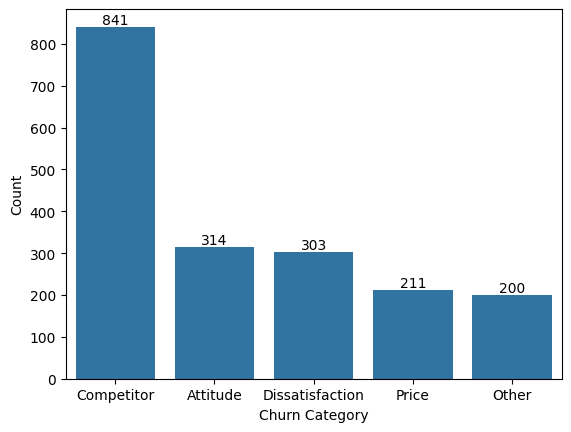

In [60]:

#plot 'Churn Categories'
df['Churn Category'] = df['Churn Category'].astype('category')
order = df['Churn Category'].value_counts().index
ax = sns.countplot(x='Churn Category', data=df, order=order)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel('Churn Category')
plt.ylabel('Count')

plt.show()



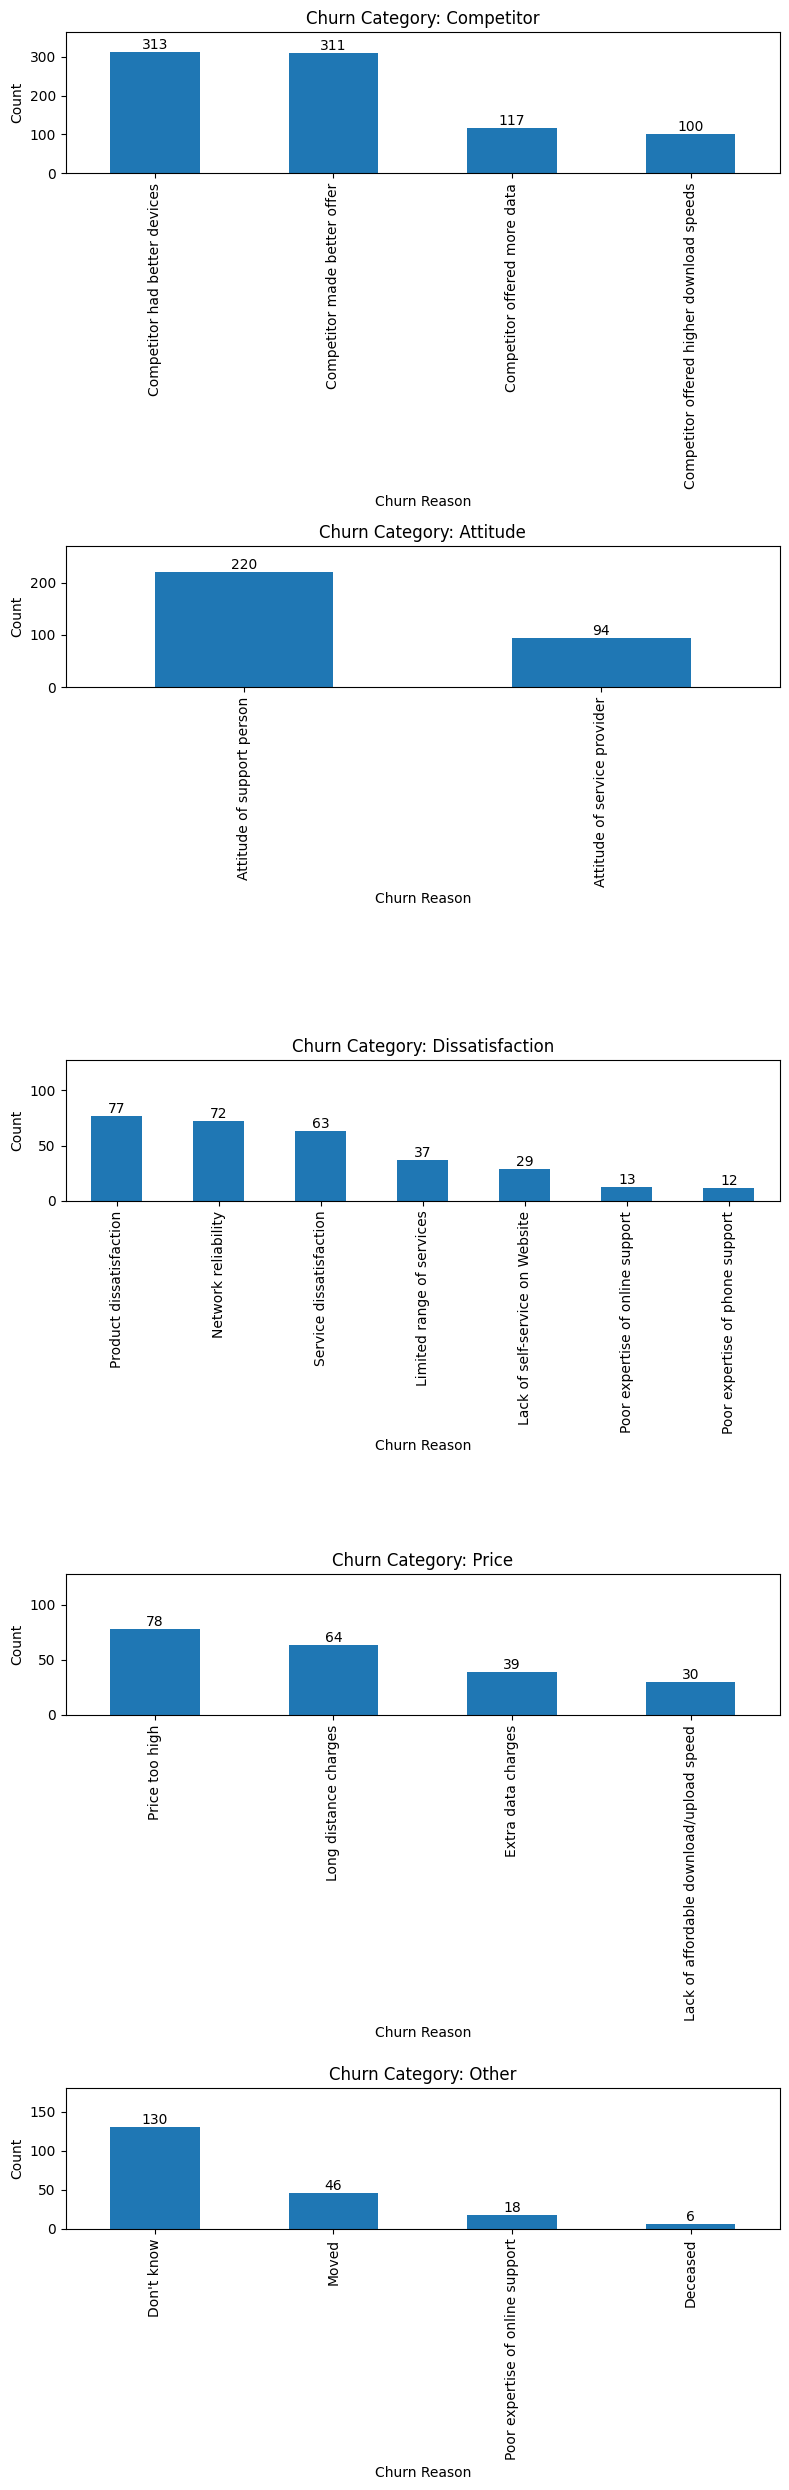

In [61]:
#plot subcategories 
df['Churn Reason'] = df['Churn Reason'].astype('category')
df['Churn Category'] = df['Churn Category'].astype('category')

churn_categories = df['Churn Category'].value_counts().index

num_rows = len(churn_categories)
num_cols = 1  

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 5*num_rows))

for i, category in enumerate(churn_categories):
    
    subset_df = df[df['Churn Category'] == category]
    
    
    cross_table = pd.crosstab(subset_df['Churn Reason'], columns='Count')
    
    
    cross_table = cross_table.sort_values(by='Count', ascending=False)
    
    
    ax = cross_table.plot(kind='bar', ax=axs[i], legend=None)
    ax.set_title(f'Churn Category: {category}')
    ax.set_xlabel('Churn Reason')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
  
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10, color='black')

    
    ax.set_ylim(0, cross_table['Count'].max() + 50)  
   
    ax.tick_params(axis='x', rotation=90)  


plt.tight_layout()


plt.show()


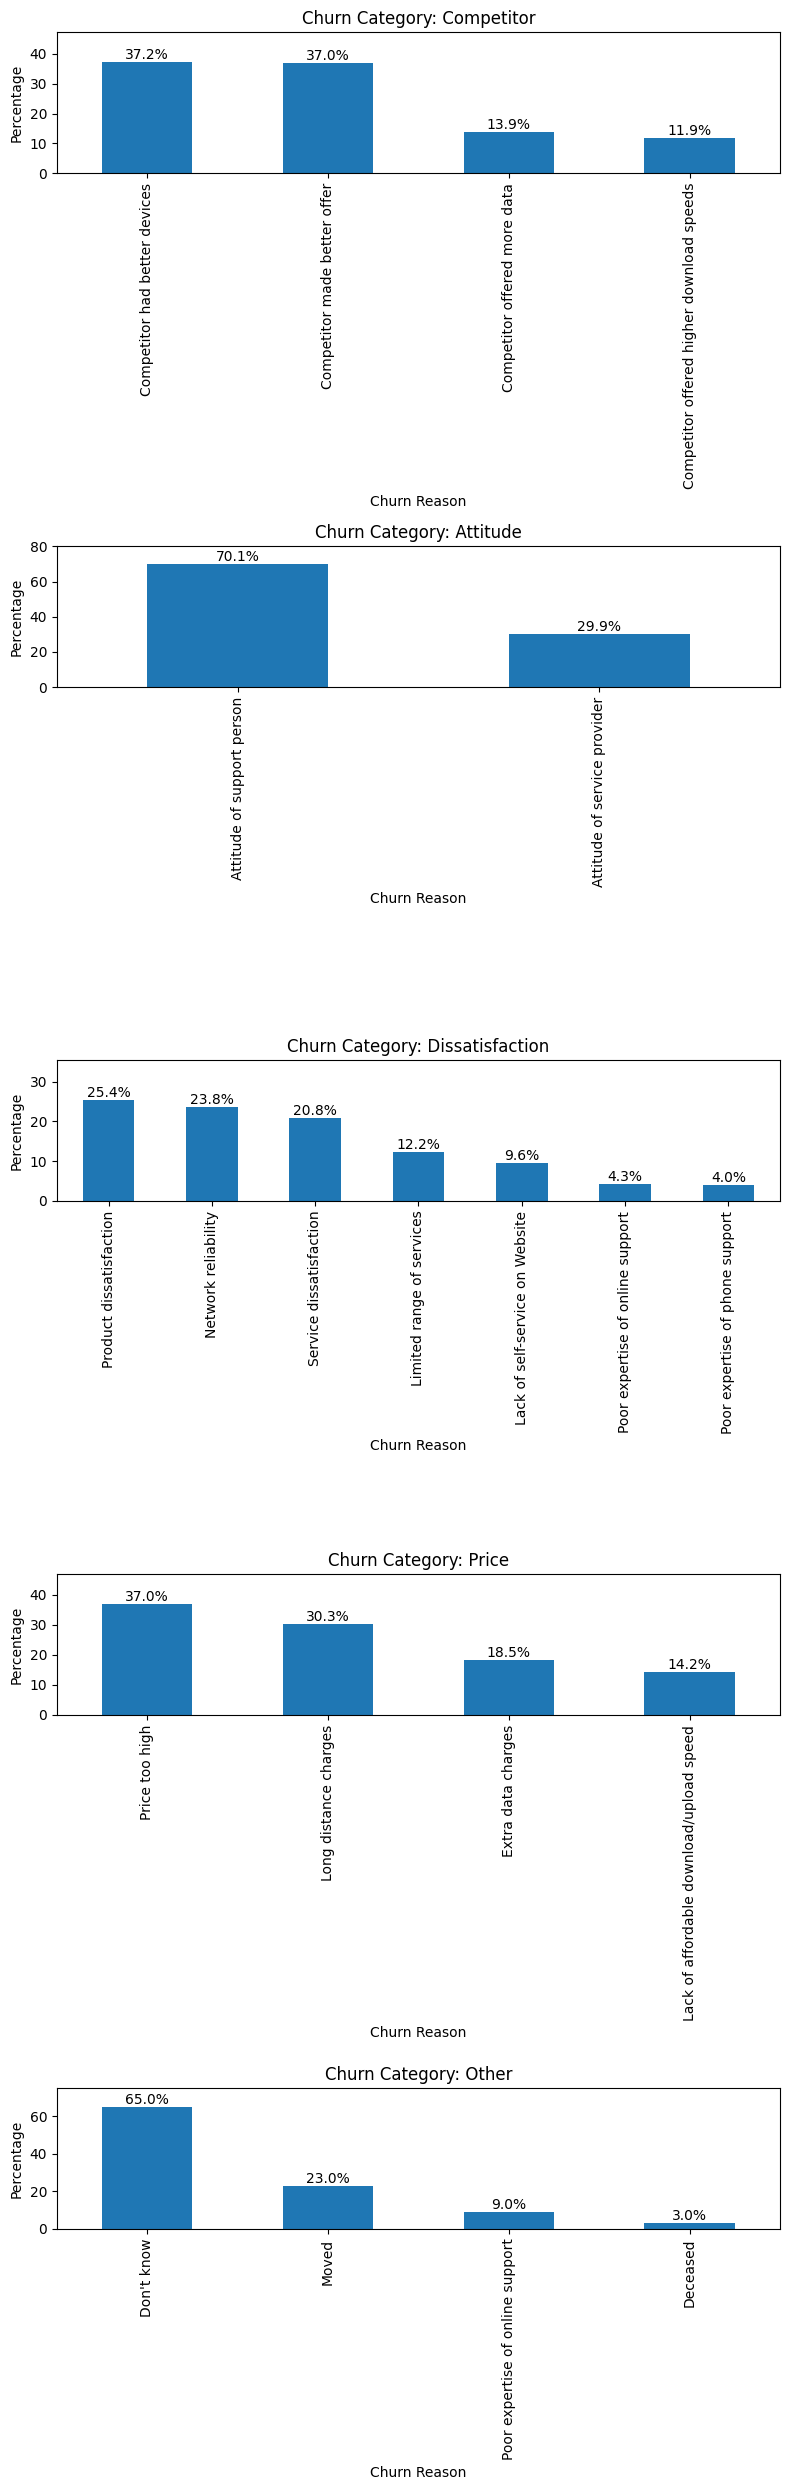

In [62]:

df['Churn Reason'] = df['Churn Reason'].astype('category')
df['Churn Category'] = df['Churn Category'].astype('category')


churn_categories = df['Churn Category'].value_counts().index


num_rows = len(churn_categories)
num_cols = 1  


fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 5*num_rows))


for i, category in enumerate(churn_categories):
    
    subset_df = df[df['Churn Category'] == category]
    
    
    cross_table = pd.crosstab(subset_df['Churn Reason'], columns='Count')
    
    
    cross_table = cross_table.sort_values(by='Count', ascending=False)
    
    
    total = cross_table['Count'].sum()
    cross_table['Percentage'] = (cross_table['Count'] / total) * 100
    
    
    ax = cross_table['Percentage'].plot(kind='bar', ax=axs[i], legend=None)
    ax.set_title(f'Churn Category: {category}')
    ax.set_xlabel('Churn Reason')
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=90)  

    
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{p.get_height():.1f}%', ha='center', va='bottom', fontsize=10, color='black')

    
    ax.set_ylim(0, cross_table['Percentage'].max() + 10)  


plt.tight_layout()


plt.show()


In [63]:
df['Churn Reason'] = df['Churn Reason'].astype('category')
df['Churn Category'] = df['Churn Category'].astype('category')


churn_categories = df['Churn Category'].value_counts().index
tables = []


for category in churn_categories:
    
    subset_df = df[df['Churn Category'] == category]
    
    
    cross_table = pd.crosstab(subset_df['Churn Reason'], columns='Count')
    
    
    cross_table = cross_table.sort_values(by='Count', ascending=False)
    
    
    total_category = cross_table['Count'].sum()
    cross_table['Percentage'] = (cross_table['Count'] / total_category) * 100
    
    
    cross_table['Churn Category'] = category
    
    
    tables.append(cross_table)


result_df = pd.concat(tables)


print(result_df)


col_0                                      Count  Percentage   Churn Category
Churn Reason                                                                 
Competitor had better devices                313   37.217598       Competitor
Competitor made better offer                 311   36.979786       Competitor
Competitor offered more data                 117   13.912010       Competitor
Competitor offered higher download speeds    100   11.890606       Competitor
Attitude of support person                   220   70.063694         Attitude
Attitude of service provider                  94   29.936306         Attitude
Product dissatisfaction                       77   25.412541  Dissatisfaction
Network reliability                           72   23.762376  Dissatisfaction
Service dissatisfaction                       63   20.792079  Dissatisfaction
Limited range of services                     37   12.211221  Dissatisfaction
Lack of self-service on Website               29    9.570957  Di

In [64]:
cross_table = pd.crosstab(df['Tenure in Months'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status     Churned     Joined    Stayed
Tenure in Months                                
1                 20.331728  51.321586  0.000000
2                  6.581059  25.330396  0.000000
3                  5.029428  23.348018  0.000000
4                  4.440877   0.000000  1.970339
5                  3.424291   0.000000  1.461864
...                     ...        ...       ...
68                 0.481541   0.000000  1.927966
69                 0.428036   0.000000  1.843220
70                 0.588550   0.000000  2.288136
71                 0.321027   0.000000  3.474576
72                 0.321027   0.000000  7.542373

[72 rows x 3 columns]


In [65]:
cross_table = pd.crosstab(df['Referred a Friend'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status      Churned    Joined     Stayed
Referred a Friend                                
No                 66.613162  82.15859  46.673729
Yes                33.386838  17.84141  53.326271


In [66]:
cross_table = pd.crosstab(df['Number of Referrals'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status        Churned     Joined     Stayed
Number of Referrals                                 
0                    66.613162  82.158590  46.673729
1                    27.126806   3.303965  11.949153
2                     1.391118   1.541850   4.300847
3                     1.712146   1.762115   4.555085
4                     0.963082   0.660793   4.555085
5                     1.123596   1.982379   4.957627
6                     0.428036   1.541850   4.364407
7                     0.321027   1.101322   5.021186
8                     0.107009   1.541850   4.322034
9                     0.214018   2.643172   4.703390
10                    0.000000   1.762115   4.555085
11                    0.000000   0.000000   0.042373


In [67]:
cross_table = pd.crosstab(df['Phone Service'], df['Customer Status'], normalize='columns') * 100

# Exibir a tabela de contingência
print(cross_table)

Customer Status    Churned     Joined     Stayed
Phone Service                                   
No                9.095773   8.370044  10.042373
Yes              90.904227  91.629956  89.957627


In [68]:
cross_table = pd.crosstab(df['Offer'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Offer                                           
None             56.233280  61.453744  53.961864
Offer A           1.872659   0.000000  10.275424
Offer B           5.403959   0.000000  15.317797
Offer C           5.082932   0.000000   6.779661
Offer D           8.614232   0.000000   9.343220
Offer E          22.792937  38.546256   4.322034


In [69]:
cross_table = pd.crosstab(df['Multiple Lines'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Multiple Lines                                  
No               54.521134  90.088106  56.016949
Yes              45.478866   9.911894  43.983051


In [70]:
cross_table = pd.crosstab(df['Internet Type'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Internet Type                                   
Cable            11.396469  12.334802  11.885593
DSL              16.425896  25.330396  26.059322
Fiber Optic      66.131621  22.246696  35.974576
No                6.046014  40.088106  26.080508


In [71]:
cross_table = pd.crosstab(df['Internet Service'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status     Churned     Joined     Stayed
Internet Service                                 
No                 6.046014  40.088106  26.080508
Yes               93.953986  59.911894  73.919492


In [72]:
cross_table = pd.crosstab(df['Online Security'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Online Security                                 
No               84.216158  89.867841  64.449153
Yes              15.783842  10.132159  35.550847


In [73]:
cross_table = pd.crosstab(df['Online Backup'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Online Backup                                   
No               72.017121  88.105727  60.762712
Yes              27.982879  11.894273  39.237288


In [74]:
cross_table = pd.crosstab(df['Device Protection Plan'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status           Churned     Joined     Stayed
Device Protection Plan                                 
No                      70.840021  92.951542  60.911017
Yes                     29.159979   7.048458  39.088983


In [75]:
cross_table = pd.crosstab(df['Premium Tech Support'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status        Churned     Joined     Stayed
Premium Tech Support                                
No                    83.41359  89.647577  64.258475
Yes                   16.58641  10.352423  35.741525


In [76]:
cross_table = pd.crosstab(df['Unlimited Data'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Unlimited Data                                  
No               19.636169  50.660793  36.038136
Yes              80.363831  49.339207  63.961864


In [77]:
cross_table = pd.crosstab(df['Contract'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Contract                                        
Month-to-Month   88.550027  89.867841  32.775424
One Year          8.881755   5.286344  28.813559
Two Year          2.568218   4.845815  38.411017


In [78]:
cross_table = pd.crosstab(df['Payment Method'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Payment Method                                  
Bank Withdrawal  71.107544  39.867841  50.826271
Credit Card      21.294810  50.881057  44.915254
Mailed Check      7.597646   9.251101   4.258475


In [79]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df['Customer Status'], [df['Satisfaction Score']])

chi2, p, dof, expected = chi2_contingency(contingency_table)

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)


print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências esperadas:")
print(expected_df)

Chi-squared: 5235.589202739663
P-value: 0.0
Graus de liberdade: 8

Frequências esperadas:
Satisfaction Score           1           2            3            4  \
Customer Status                                                        
Churned             244.671021  137.461593   707.210706   474.746699   
Joined               59.433196   33.390885   171.789010   115.321028   
Stayed              617.895783  347.147522  1786.000284  1198.932273   

Satisfaction Score           5  
Customer Status                 
Churned             304.909982  
Joined               74.065881  
Stayed              770.024137  


In [80]:
contingency_table = pd.crosstab(df['Customer Status'], [df['Phone Service']])

chi2, p, dof, expected = chi2_contingency(contingency_table)

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências esperadas:")
print(expected_df)

Chi-squared: 2.3288121807186317
P-value: 0.3121079709316997
Graus de liberdade: 2

Frequências esperadas:
Phone Service            No          Yes
Customer Status                         
Churned          180.982252  1688.017748
Joined            43.962516   410.037484
Stayed           457.055232  4262.944768


In [81]:
contingency_table = pd.crosstab(df['Customer Status'], [df['Offer']])

chi2, p, dof, expected = chi2_contingency(contingency_table)

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências esperadas:")
print(expected_df)

Chi-squared: 1127.2667309284784
P-value: 6.982366892336427e-236
Graus de liberdade: 10

Frequências esperadas:
Offer                   None     Offer A     Offer B     Offer C     Offer D  \
Customer Status                                                                
Churned          1028.838989  137.992333  218.664774  110.128496  159.752662   
Joined            249.915945   33.519807   53.116002   26.751384   38.805623   
Stayed           2598.245066  348.487860  552.219225  278.120119  403.441715   

Offer               Offer E  
Customer Status              
Churned          213.622746  
Joined            51.891240  
Stayed           539.486014  


In [82]:
contingency_table = pd.crosstab(df['Customer Status'], [df['Internet Type']])

chi2, p, dof, expected = chi2_contingency(contingency_table)

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências esperadas:")
print(expected_df)

Chi-squared: 709.615343647653
P-value: 5.133221927080096e-150
Graus de liberdade: 6

Frequências esperadas:
Internet Type         Cable          DSL  Fiber Optic           No
Customer Status                                                   
Churned          220.256993   438.391027   805.397558   404.954423
Joined            53.502769   106.489848   195.639642    98.367741
Stayed           556.240239  1107.119125  2033.962800  1022.677836


In [83]:
contingency_table = pd.crosstab(df['Customer Status'], [df['Unlimited Data']])

chi2, p, dof, expected = chi2_contingency(contingency_table)

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências esperadas:")
print(expected_df)

Chi-squared: 235.6388151457628
P-value: 6.787055959638584e-52
Graus de liberdade: 2

Frequências esperadas:
Unlimited Data            No          Yes
Customer Status                          
Churned           609.819963  1259.180037
Joined            148.131762   305.868238
Stayed           1540.048275  3179.951725


In [84]:
contingency_table = pd.crosstab(df['Customer Status'], [df['Premium Tech Support']])

chi2, p, dof, expected = chi2_contingency(contingency_table)

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências esperadas:")
print(expected_df)

Chi-squared: 320.5914294787174
P-value: 2.4235702677867366e-70
Graus de liberdade: 2

Frequências esperadas:
Premium Tech Support           No          Yes
Customer Status                               
Churned               1326.583984   542.416016
Joined                 322.241374   131.758626
Stayed                3350.174641  1369.825359


In [85]:
#Map 'Yes' to 1 and 'No' to 0 for all variables in the list
binary_variables = ['Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data', 'Streaming TV', 'Streaming Movies', 'Streaming Music']

df[binary_variables] = df[binary_variables].apply(lambda x: x.map({'Yes': 1, 'No': 0}))




In [86]:
print(df['Multiple Lines'].unique())

[0 1]


In [87]:
subscription_columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data']
streaming_columns = ['Streaming TV', 'Streaming Movies', 'Streaming Music']

In [88]:
df['Total Number Subscrption'] = df[subscription_columns].sum(axis=1)
df['Total Number Subscrption'].value_counts()

Total Number Subscrption
5    1295
4    1274
1    1205
6     990
3     881
2     582
7     543
8     273
Name: count, dtype: int64

In [89]:
df['Streaming Usage'] = df[streaming_columns].sum(axis=1)
df['Streaming Usage'].value_counts()

Streaming Usage
0    3445
3    1670
2     989
1     939
Name: count, dtype: int64

In [90]:
missing_values = df.isna().sum()

variables_with_missing = missing_values[missing_values > 0]

print(variables_with_missing)

Churn Category    5174
Churn Reason      5174
dtype: int64


In [91]:
cross_table = pd.crosstab(df['Total Number Subscrption'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status             Churned     Joined     Stayed
Total Number Subscrption                                 
1                          5.939005  39.207048  19.406780
2                          7.437132   9.471366   8.474576
3                         22.739433  23.348018   7.415254
4                         28.250401  19.603524  13.919492
5                         20.331728   6.607930  18.750000
6                         11.289460   1.762115  16.334746
7                          3.317282   0.000000  10.190678
8                          0.695559   0.000000   5.508475


In [92]:
grouped_data = df.groupby('Customer Status')['Total Number Subscrption'].mean()
print(grouped_data)

Customer Status
Churned    4.002140
Joined     2.502203
Stayed     4.214407
Name: Total Number Subscrption, dtype: float64


In [93]:
cross_table = pd.crosstab(df['Streaming Usage'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Streaming Usage                                 
0                39.807384  82.819383  49.258475
1                18.191546   6.387665  12.076271
2                17.924024   5.726872  13.305085
3                24.077047   5.066079  25.360169


In [94]:
print(df['Tenure in Months'].describe())

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64


In [95]:
statistics_per_status = df.groupby('Customer Status')['Tenure in Months'].describe()

print(statistics_per_status)

                  count       mean        std  min   25%   50%   75%   max
Customer Status                                                           
Churned          1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
Joined            454.0   1.720264   0.818486  1.0   1.0   1.0   2.0   3.0
Stayed           4720.0  41.041525  22.363674  4.0  21.0  42.0  63.0  72.0


In [96]:
cross_table = pd.crosstab(df['Tenure in Months'], df['Customer Status'])

print(cross_table)

Customer Status   Churned  Joined  Stayed
Tenure in Months                         
1                     380     233       0
2                     123     115       0
3                      94     106       0
4                      83       0      93
5                      64       0      69
...                   ...     ...     ...
68                      9       0      91
69                      8       0      87
70                     11       0     108
71                      6       0     164
72                      6       0     356

[72 rows x 3 columns]


In [97]:

limites_intervalos = [0, 19, 37, 55, float('inf')]  


df['Tenure in Months Bins'] = pd.cut(df['Tenure in Months'], bins=limites_intervalos, labels=["until 18 months", "between 19 and 36", "between 37 and 54", "more than 55"])


print(df['Tenure in Months Bins'].value_counts())


Tenure in Months Bins
until 18 months      2807
more than 55         1755
between 19 and 36    1300
between 37 and 54    1181
Name: count, dtype: int64


In [98]:
limites = pd.cut(df['Tenure in Months'], bins=limites_intervalos, right=False).unique()

for i, intervalo in enumerate(limites):
    print(f'Intervalo {i + 1}: {intervalo}, Limites: {intervalo.left} a {intervalo.right - 1}')

Intervalo 1: [0.0, 19.0), Limites: 0.0 a 18.0
Intervalo 2: [55.0, inf), Limites: 55.0 a inf
Intervalo 3: [37.0, 55.0), Limites: 37.0 a 54.0
Intervalo 4: [19.0, 37.0), Limites: 19.0 a 36.0


In [99]:
cross_table = pd.crosstab(df['Tenure in Months Bins'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status          Churned  Joined     Stayed
Tenure in Months Bins                              
until 18 months        65.971108   100.0  23.728814
between 19 and 36      15.676833     0.0  21.334746
between 37 and 54      11.075441     0.0  20.635593
more than 55            7.276619     0.0  34.300847


In [100]:
df['Total Revenue Tenure Months'] = df['Total Revenue'] / df['Tenure in Months']

In [101]:
df['Total Revenue Bins'] = pd.cut(df['Total Revenue Tenure Months'], 3, labels=["Low", "Medium", "High"])
df['Total Revenue Bins'].value_counts()

Total Revenue Bins
Medium    3657
Low       2660
High       726
Name: count, dtype: int64

In [102]:
#get values per month
bins = pd.cut(df['Total Revenue Tenure Months'], 3).unique()


for intervalo in bins:
    print(f'Intervalo: {intervalo}, Valores: {intervalo.left} a {intervalo.right}')



Intervalo: (17.993, 75.677], Valores: 17.993 a 75.677
Intervalo: (75.677, 133.189], Valores: 75.677 a 133.189
Intervalo: (133.189, 190.7], Valores: 133.189 a 190.7


In [103]:
grouped_data = df.groupby('Customer Status')['Total Revenue Tenure Months'].sum()

print(grouped_data)

Customer Status
Churned    183780.619378
Joined      30601.730000
Stayed     406247.912822
Name: Total Revenue Tenure Months, dtype: float64


In [104]:
grouped_data = df.groupby('Customer Status')['Total Revenue Tenure Months'].mean()

print(grouped_data)


Customer Status
Churned    98.330990
Joined     67.404692
Stayed     86.069473
Name: Total Revenue Tenure Months, dtype: float64


In [105]:
total_revenue = df['Total Revenue Tenure Months'].sum()

print(f'O valor total do Total Revenue Tenure Months é: {total_revenue}')

O valor total do Total Revenue Tenure Months é: 620630.2621998421


In [106]:
cross_table = pd.crosstab(df['Total Revenue Bins'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status       Churned     Joined     Stayed
Total Revenue Bins                                 
Low                 21.829856  62.114537  41.737288
Medium              66.024612  35.682819  47.902542
High                12.145532   2.202643  10.360169


In [107]:
cross_table = pd.crosstab(df['Total Revenue Bins'], df['Customer Status'])
print(cross_table)

Customer Status     Churned  Joined  Stayed
Total Revenue Bins                         
Low                     408     282    1970
Medium                 1234     162    2261
High                    227      10     489


In [108]:
statistics = df['Total Revenue Tenure Months'].describe()

print(statistics)


count    7043.000000
mean       88.120156
std        35.910838
min        18.166000
25%        56.765136
50%        93.246364
75%       117.016111
max       190.700000
Name: Total Revenue Tenure Months, dtype: float64


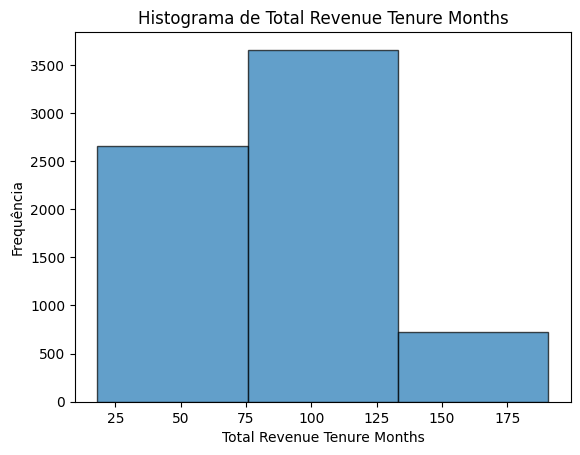

In [109]:
#plot 'Total Revenue Tenure Months'
num_bins = 3
plt.hist(df['Total Revenue Tenure Months'], bins=num_bins, edgecolor='k', alpha=0.7)

plt.xlabel('Total Revenue Tenure Months')
plt.ylabel('Frequência')
plt.title('Histograma de Total Revenue Tenure Months')

plt.show()


In [110]:
cross_table = pd.crosstab(df['Gender'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status   Churned     Joined     Stayed
Gender                                         
Female           50.24077  46.475771  49.533898
Male             49.75923  53.524229  50.466102


In [111]:
cross_table = pd.crosstab(df['Under 30'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Under 30                                        
No               83.734617  78.193833  78.855932
Yes              16.265383  21.806167  21.144068


In [112]:
cross_table = pd.crosstab(df['Senior Citizen'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned    Joined     Stayed
Senior Citizen                                 
No               74.531835  93.39207  86.525424
Yes              25.468165   6.60793  13.474576


In [113]:
statistics = df['Age'].describe()

print(statistics)

count    7043.000000
mean       46.509726
std        16.750352
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: Age, dtype: float64


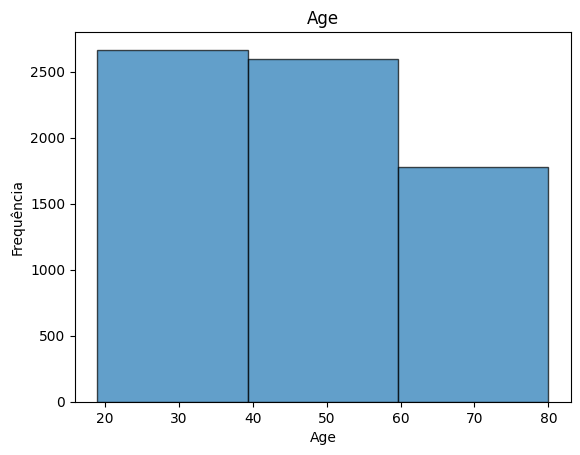

In [114]:

#plot age intervals 
num_bins = 3
plt.hist(df['Age'], bins=num_bins, edgecolor='k', alpha=0.7)


plt.xlabel('Age')
plt.ylabel('Frequência')
plt.title('Age')


plt.show()

In [115]:
bins = pd.cut(df['Age'], 3).unique()


for intervalo in bins:
    print(f'Intervalo: {intervalo}, Valores: {intervalo.left} a {intervalo.right}')

Intervalo: (59.667, 80.0], Valores: 59.667 a 80.0
Intervalo: (18.939, 39.333], Valores: 18.939 a 39.333
Intervalo: (39.333, 59.667], Valores: 39.333 a 59.667


In [116]:
limites = [0, 30, 65, float('inf')]
rotulos = ['Under 30', '30 to 65', 'Senior Citizen']
df['Age Group'] = pd.cut(df['Age'], bins=limites, labels=rotulos, right=False)

df['Age Group'].value_counts()

Age Group
30 to 65          4500
Under 30          1401
Senior Citizen    1142
Name: count, dtype: int64

In [117]:
cross_table = pd.crosstab(df['Age Group'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Age Group                                       
Under 30         16.265383  21.806167  21.144068
30 to 65         58.266453  71.585903  65.381356
Senior Citizen   25.468165   6.607930  13.474576


In [118]:
cross_table = pd.crosstab(df['Married'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Married                                         
No               64.205457  81.497797  43.877119
Yes              35.794543  18.502203  56.122881


In [119]:
cross_table = pd.crosstab(df['Dependents'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Joined     Stayed
Dependents                                      
No               94.328518  82.378855  69.470339
Yes               5.671482  17.621145  30.529661


In [120]:
cross_table = pd.crosstab(df['Number of Dependents'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status         Churned     Joined     Stayed
Number of Dependents                                 
0                     94.328518  82.378855  69.470339
1                      2.033173   5.947137  10.338983
2                      1.765650   5.506608  10.021186
3                      1.605136   5.726872   9.766949
4                      0.053505   0.220264   0.148305
5                      0.107009   0.220264   0.148305
6                      0.053505   0.000000   0.042373
7                      0.053505   0.000000   0.021186
8                      0.000000   0.000000   0.021186
9                      0.000000   0.000000   0.021186


In [121]:
df_copy = df.copy()

#Replace 'joined' fot 'stayed' in 'Customer Status'
df_copy['Customer Status'] = df_copy['Customer Status'].replace('Joined', 'Stayed')


cross_table = pd.crosstab(df_copy['Married'], df_copy['Customer Status'], normalize='columns') * 100
print(cross_table)


Customer Status    Churned     Stayed
Married                              
No               64.205457  47.178199
Yes              35.794543  52.821801


In [122]:
df_copy = df.copy()
df_copy['Customer Status'] = df_copy['Customer Status'].replace('Joined', 'Stayed')

cross_table = pd.crosstab(df_copy['Married'], df_copy['Customer Status'])
print(cross_table)

Customer Status  Churned  Stayed
Married                         
No                  1200    2441
Yes                  669    2733


In [123]:
df_copy = df.copy()

df_copy['Customer Status'] = df_copy['Customer Status'].replace('Joined', 'Stayed')


cross_table = pd.crosstab(df_copy['Gender'], df_copy['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status   Churned     Stayed
Gender                              
Female           50.24077  49.265559
Male             49.75923  50.734441


In [124]:
df_copy = df.copy()
df_copy['Customer Status'] = df_copy['Customer Status'].replace('Joined', 'Stayed')


cross_table = pd.crosstab(df_copy['Dependents'], df_copy['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Stayed
Dependents                           
No               94.328518  70.603015
Yes               5.671482  29.396985


In [125]:
df_copy = df.copy()
df_copy['Customer Status'] = df_copy['Customer Status'].replace('Joined', 'Stayed')


cross_table = pd.crosstab(df_copy['Age Group'], df_copy['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status    Churned     Stayed
Age Group                            
Under 30         16.265383  21.202165
30 to 65         58.266453  65.925783
Senior Citizen   25.468165  12.872053


In [126]:
import folium

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

for i, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

# Save the mapa in arquivo HTML
m.save(r'mapa.html')




FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mgs\\Documents\\Pessoal\\Pos Graduação 2023\\Semestre Outono\\Enterprise Data Science Bootcamp\\Projecto\\mapa.html'

In [ ]:
df_churned = df[df['Customer Status'] == 'Churned']


m = folium.Map(location=[df_churned['Latitude'].mean(), df_churned['Longitude'].mean()], zoom_start=5)


for i, row in df_churned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

# Save the map in arquivo HTML
m.save(r'mapa_churned.html')

In [ ]:
df_stayed = df[df['Customer Status'] == 'Stayed']


m = folium.Map(location=[df_stayed['Latitude'].mean(), df_stayed['Longitude'].mean()], zoom_start=5)


for i, row in df_stayed.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

# Save the map in arquivo HTML
m.save(r'mapa_stayed.html')

In [ ]:
df_joined = df[df['Customer Status'] == 'Joined']


m = folium.Map(location=[df_joined['Latitude'].mean(), df_joined['Longitude'].mean()], zoom_start=5)


for i, row in df_joined.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

# Save map in arquivo HTML
m.save(r'mapa_joined.html')

In [127]:
cross_table = pd.crosstab(df['City'], df['Customer Status'], normalize='columns') * 100
print(cross_table)

Customer Status   Churned    Joined    Stayed
City                                         
Acampo           0.160514  0.000000  0.021186
Acton            0.000000  0.000000  0.084746
Adelanto         0.053505  0.000000  0.084746
Adin             0.107009  0.000000  0.042373
Agoura Hills     0.107009  0.440529  0.021186
...                   ...       ...       ...
Yreka            0.000000  0.000000  0.084746
Yuba City        0.107009  0.000000  0.127119
Yucaipa          0.053505  0.000000  0.063559
Yucca Valley     0.000000  0.000000  0.105932
Zenia            0.053505  0.000000  0.063559

[1106 rows x 3 columns]


In [128]:
cross_table = pd.crosstab(df['City'], df['Customer Status'], normalize='columns') * 100
cross_table = cross_table.sort_values(by='Churned', ascending=False)
print(cross_table)

Customer Status   Churned    Joined    Stayed
City                                         
San Diego        9.898341  1.541850  1.970339
Los Angeles      4.173355  3.964758  4.173729
San Francisco    1.658641  1.541850  1.398305
San Jose         1.551632  0.440529  1.716102
Sacramento       1.391118  1.321586  1.610169
...                   ...       ...       ...
San Geronimo     0.000000  0.000000  0.084746
Kettleman City   0.000000  0.220264  0.063559
Dulzura          0.000000  0.000000  0.084746
Duncans Mills    0.000000  0.000000  0.084746
Lost Hills       0.000000  0.000000  0.084746

[1106 rows x 3 columns]


In [129]:
cross_table = pd.crosstab(df['City'], df['Customer Status'], normalize='columns') * 100
cross_table = cross_table.sort_values(by='Joined', ascending=False)
print(cross_table)

Customer Status   Churned    Joined    Stayed
City                                         
Los Angeles      4.173355  3.964758  4.173729
San Francisco    1.658641  1.541850  1.398305
San Diego        9.898341  1.541850  1.970339
Sacramento       1.391118  1.321586  1.610169
Glendale         0.695559  1.321586  0.444915
...                   ...       ...       ...
Jenner           0.053505  0.000000  0.063559
Johannesburg     0.107009  0.000000  0.000000
Jolon            0.107009  0.000000  0.042373
Joshua Tree      0.000000  0.000000  0.084746
Zenia            0.053505  0.000000  0.063559

[1106 rows x 3 columns]


In [130]:
cross_table = pd.crosstab(df['City'], df['Customer Status'], normalize='columns') * 100
cross_table = cross_table.sort_values(by='Stayed', ascending=False)

print(cross_table)

Customer Status   Churned    Joined    Stayed
City                                         
Los Angeles      4.173355  3.964758  4.173729
San Diego        9.898341  1.541850  1.970339
San Jose         1.551632  0.440529  1.716102
Sacramento       1.391118  1.321586  1.610169
San Francisco    1.658641  1.541850  1.398305
...                   ...       ...       ...
Paskenta         0.160514  0.220264  0.000000
Johannesburg     0.107009  0.000000  0.000000
Templeton        0.160514  0.220264  0.000000
Armona           0.107009  0.440529  0.000000
Boulder Creek    0.214018  0.000000  0.000000

[1106 rows x 3 columns]


In [131]:
df.shape

(7043, 57)

In [132]:
df.columns

Index(['Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Population', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Churn Score Category', 'CLTV Category',
       'To

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Count                              7043 non-null   int64   
 1   Gender                             7043 non-null   object  
 2   Age                                7043 non-null   int64   
 3   Under 30                           7043 non-null   object  
 4   Senior Citizen                     7043 non-null   object  
 5   Married                            7043 non-null   object  
 6   Dependents                         7043 non-null   object  
 7   Number of Dependents               7043 non-null   int64   
 8   City                               7043 non-null   object  
 9   Zip Code                           7043 non-null   int64   
 10  Lat Long                           7043 non-null   object  
 11  Latitude                         

Feature Selection

In [134]:
dflimpo = df.drop(['Under 30', 'Senior Citizen', 'Satisfaction Score', 'Churn Label', 'Customer Status', 'Churn Score', 'Churn Score Category', 'CLTV', 'CLTV Category', 'Churn Category', 'Churn Reason', 'Tenure in Months Bins', 'Total Revenue Bins', 'Lat Long', 'Age Group'], axis=1)

In [135]:
dflimpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Count                              7043 non-null   int64  
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   Zip Code                           7043 non-null   int64  
 8   Latitude                           7043 non-null   float64
 9   Longitude                          7043 non-null   float64
 10  Population                         7043 non-null   int64  
 11  Churn Value                        7043 non-nu

In [136]:
from sklearn.model_selection import StratifiedKFold
from scipy import stats

In [137]:
skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)

In [138]:

X = dflimpo.drop(['Churn Value'], axis=1)

y = dflimpo['Churn Value'].copy()

Categorical variables 

In [139]:
#apply chisquare
def apply_chisquare(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [140]:
def select_best_cat_features(X,y):
    count = 1
    
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
      
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using chi-square
        X_train_cat = X_train[['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']].copy()
        for var in X_train_cat:
            apply_chisquare(X_train_cat[var],y_train, var)
            
        count+=1

In [141]:
select_best_cat_features(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Gender is NOT an important predictor. (Discard Gender from model)
Married is IMPORTANT for Prediction
Offer is IMPORTANT for Prediction
Phone Service is NOT an important predictor. (Discard Phone Service from model)
Multiple Lines is IMPORTANT for Prediction
Internet Type is IMPORTANT for Prediction
Online Security is IMPORTANT for Prediction
Online Backup is IMPORTANT for Prediction
Device Protection Plan is IMPORTANT for Prediction
Premium Tech Support is IMPORTANT for Prediction
Streaming TV is IMPORTANT for Prediction
Streaming Movies is IMPORTANT for Prediction
Streaming Music is IMPORTANT for Prediction
Unlimited Data is IMPORTANT for Prediction
Contract is IMPORTANT for Prediction
Paperless Billing is IMPO

In [142]:
X = X.drop(['Gender'], axis = 1)
X = X.drop(['Phone Service'], axis = 1)


In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Count                              7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Dependents                         7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Population                         7043 non-null   int64  
 10  Referred a Friend                  7043 non-null   int64  
 11  Number of Referrals                7043 non-nu

Numerical variables

In [144]:
def apply_variance(X_train):
    numeric_columns = X_train.select_dtypes(include=[np.number]).columns
    X_train_numeric = X_train[numeric_columns]
    print(X_train_numeric.var())

In [145]:
def select_features_variance(X,y):
    count = 1
    
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using variance
        X_train_numeric = X_train.drop(['Count', 'Zip Code', 'Referred a Friend', 'Multiple Lines','Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data'], axis=1)
        apply_variance(X_train_numeric)
  
        count += 1

In [146]:
#apply variance
select_features_variance(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Age                                  2.806249e+02
Number of Dependents                 9.509849e-01
Latitude                             6.152352e+00
Longitude                            4.640332e+00
Population                           4.487014e+08
Number of Referrals                  9.107576e+00
Tenure in Months                     6.050914e+02
Avg Monthly Long Distance Charges    2.389875e+02
Avg Monthly GB Download              4.180707e+02
Monthly Charge                       8.999648e+02
Total Charges                        5.172229e+06
Total Refunds                        6.268128e+01
Total Extra Data Charges             6.150841e+02
Total Long Distance Charges          7.297293e+05
Total Revenue         

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


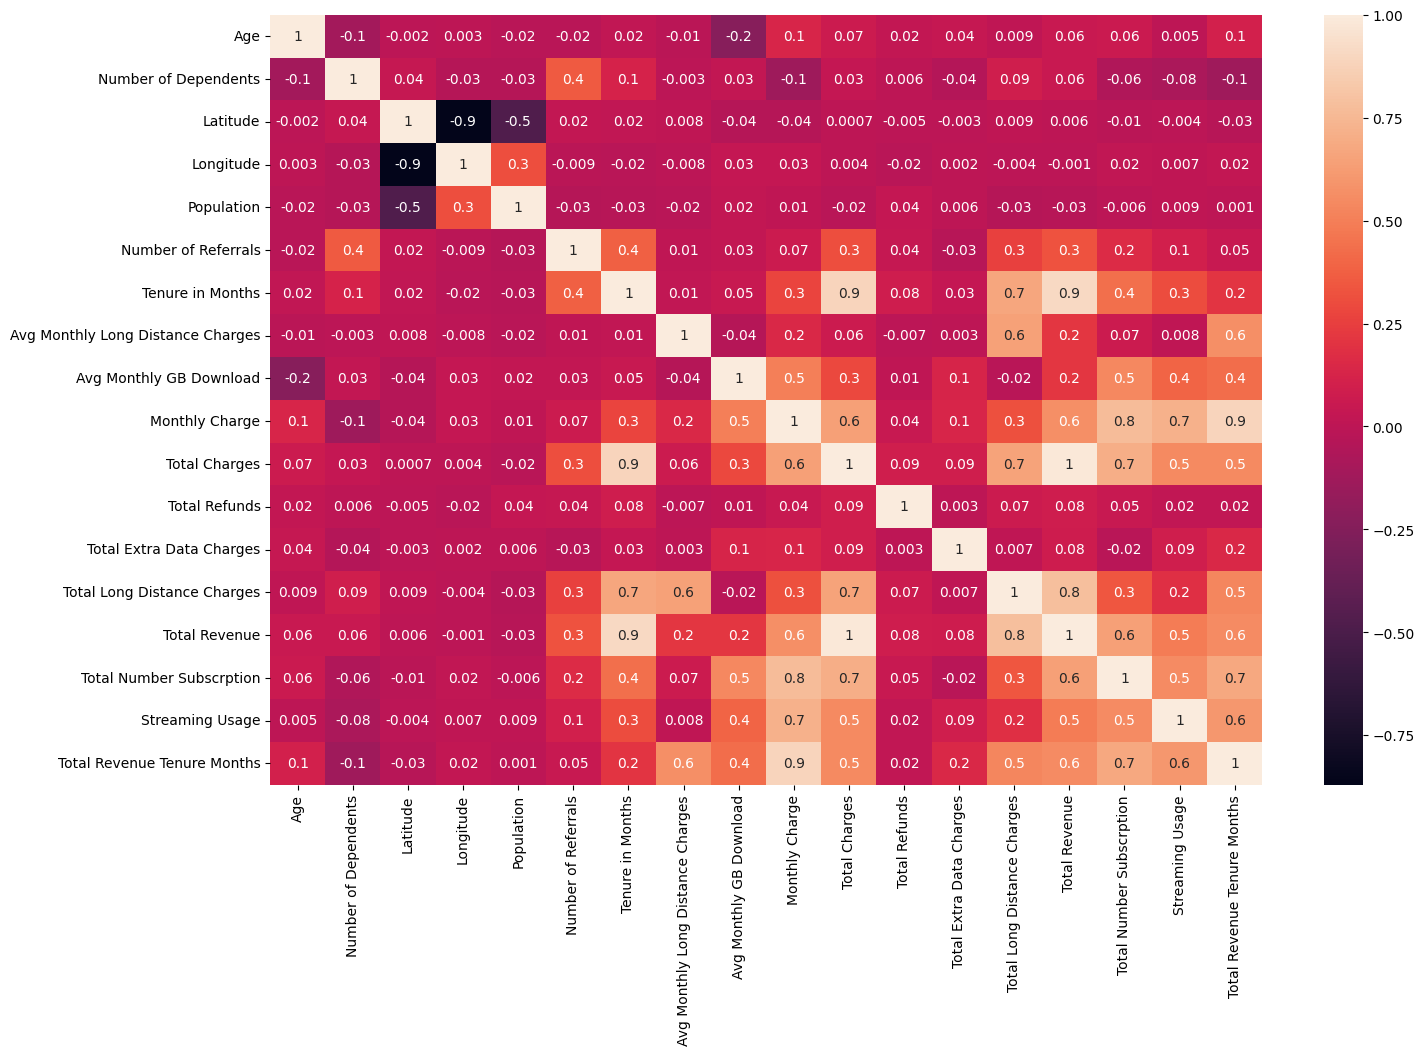

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


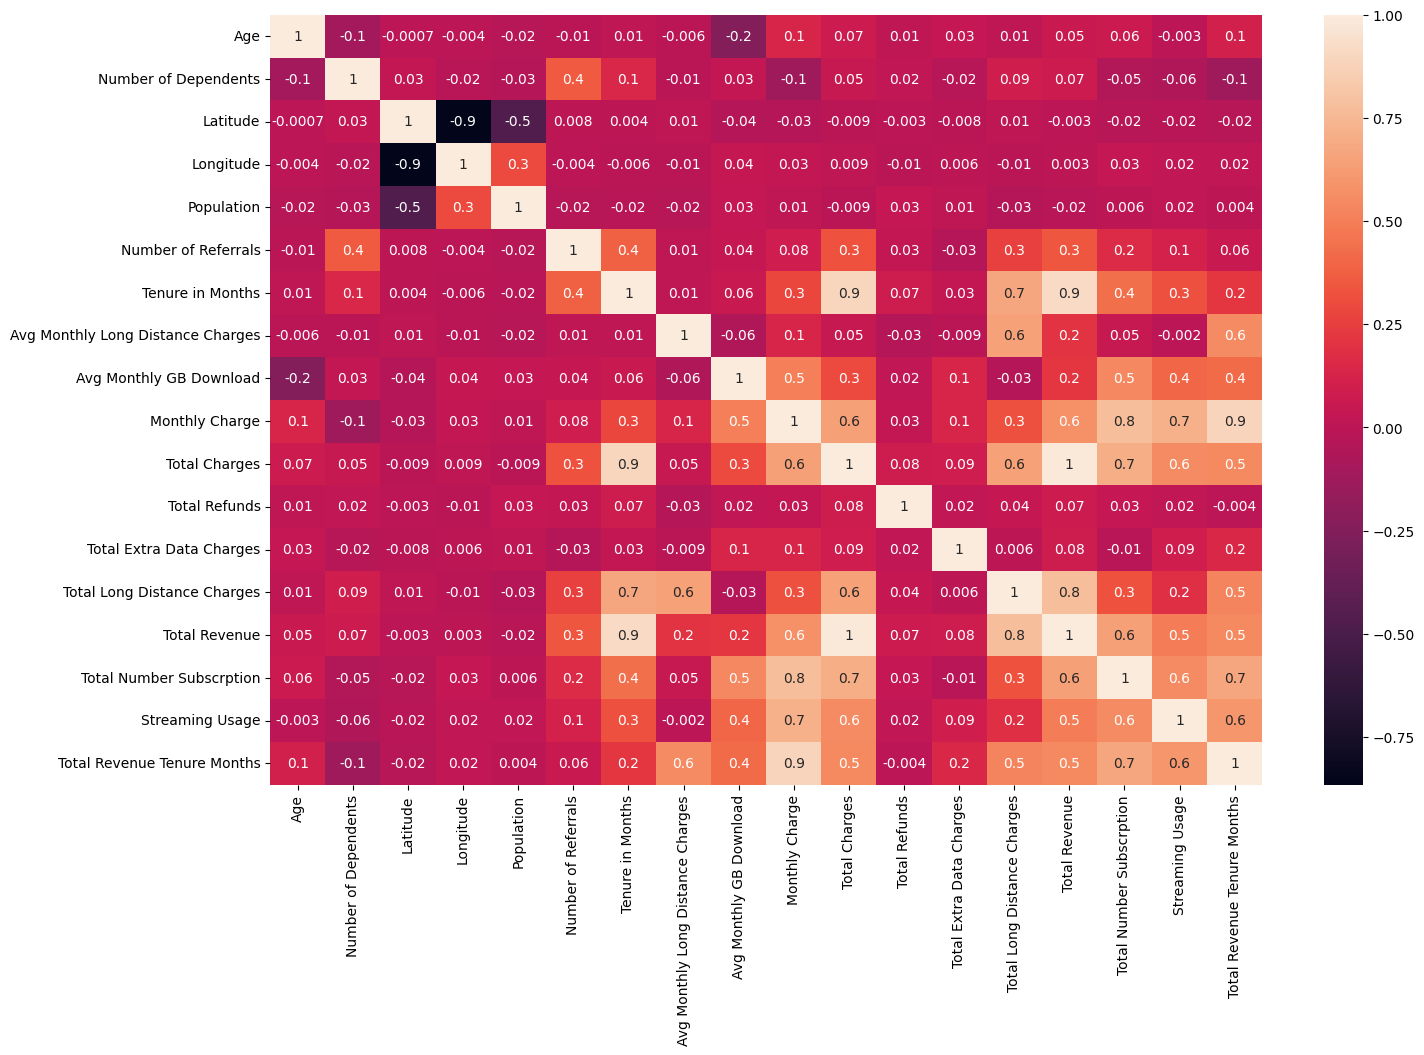

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


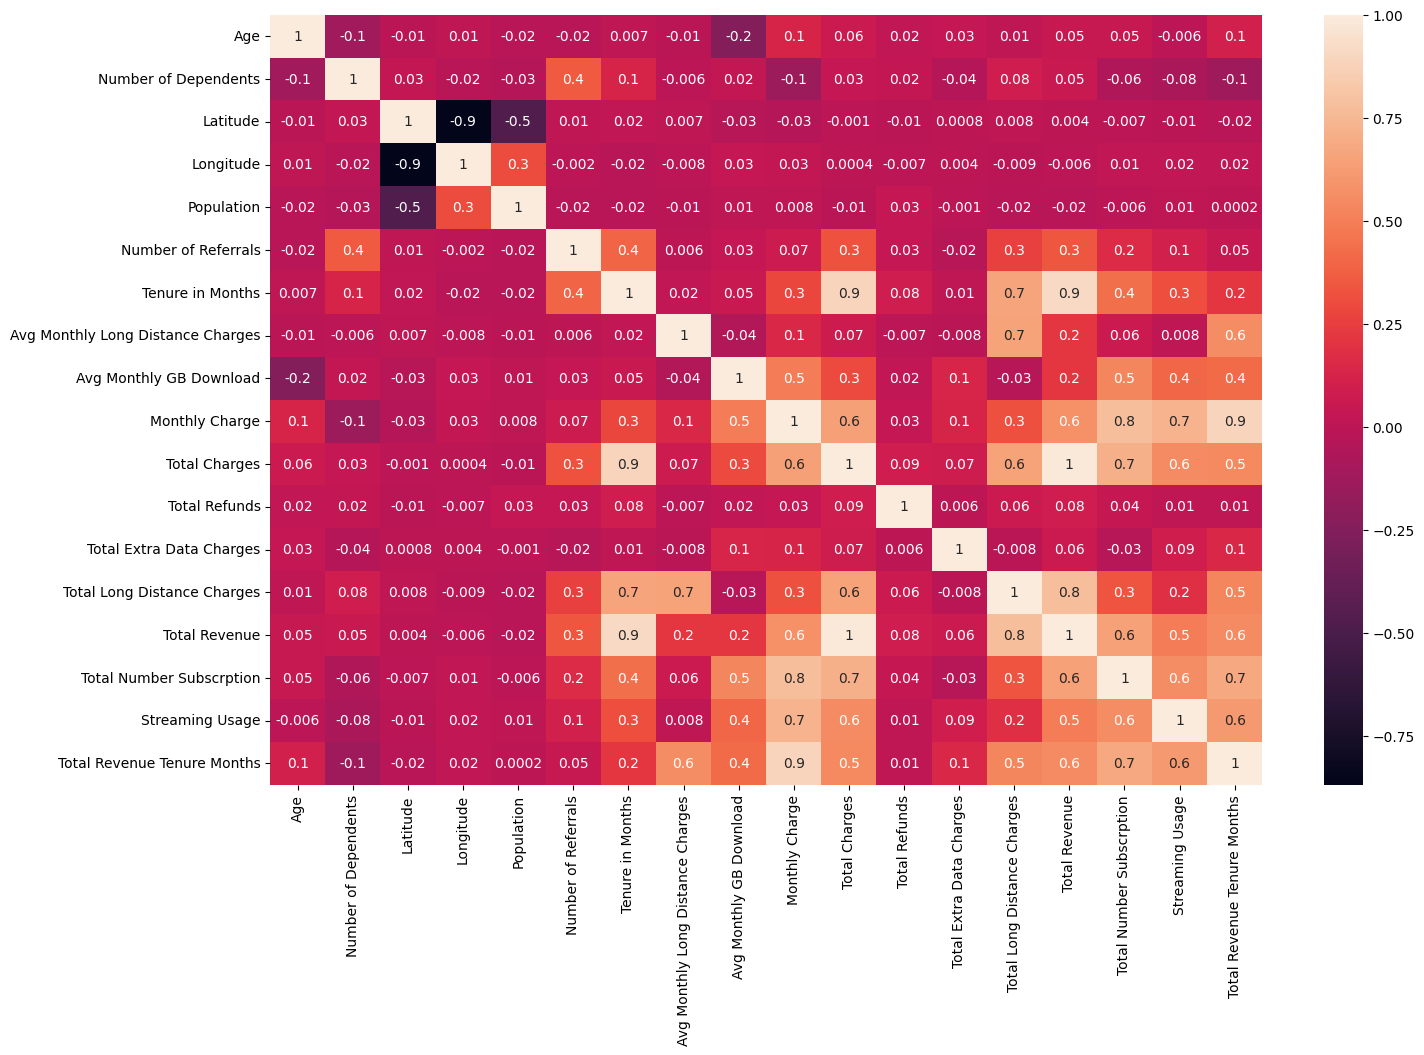

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


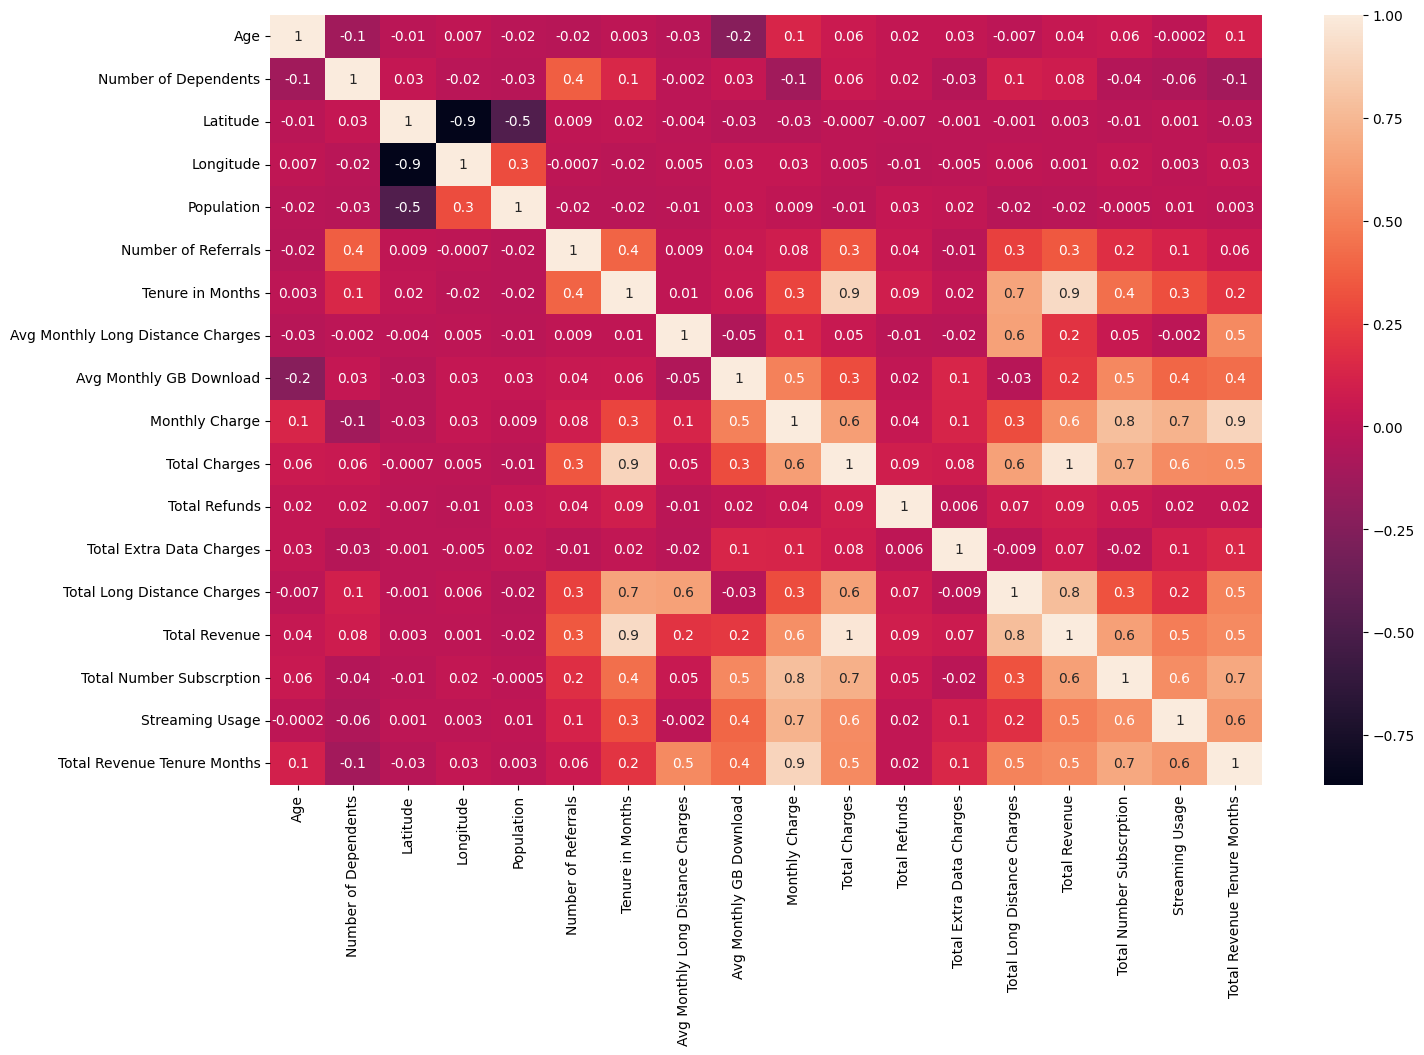

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


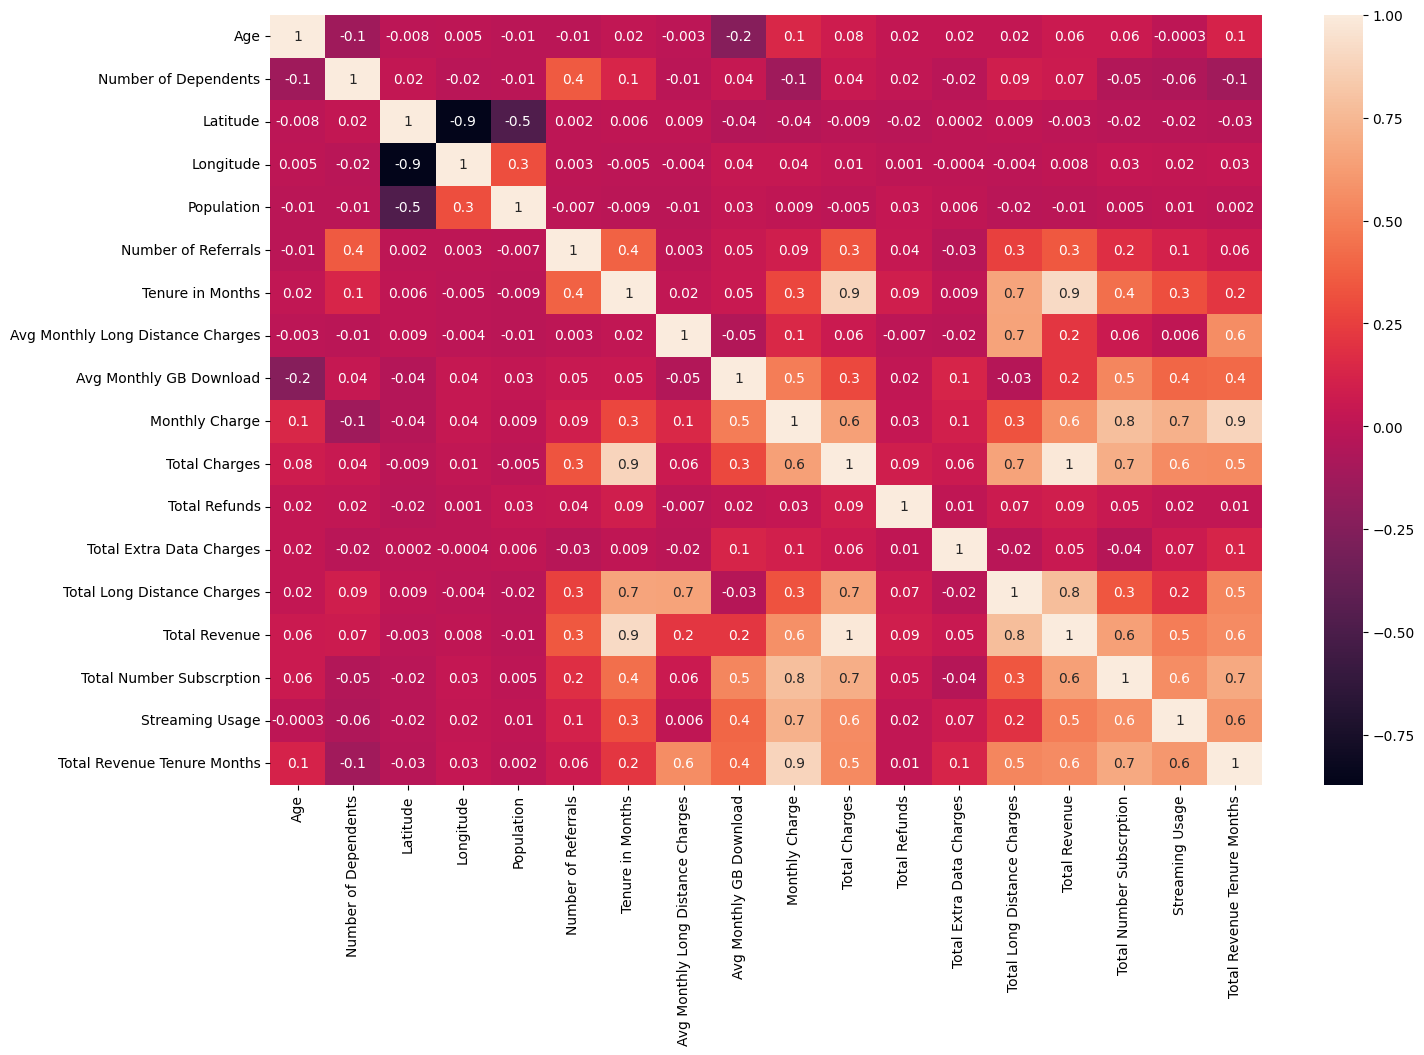

In [147]:
#apply spearman correlation matrix
def cor_heatmap(cor):
    plt.figure(figsize=(16,10))
    sns.heatmap(data=cor, annot=True, fmt='.1g')
    plt.show()


def apply_correlation(X_train):
    
    numeric_data = X_train.select_dtypes(include=['number'])
    
    
    columns_to_remove = ['Count', 'Zip Code', 'Referred a Friend', 'Multiple Lines','Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']
    numeric_data = numeric_data.drop(columns=columns_to_remove, errors='ignore')
    
    
    matrix = numeric_data.corr(method='spearman')
    
    
    cor_heatmap(matrix)

def select_features_correlation(X,y):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    count = 1
    
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        
        apply_correlation(X_train)
  
        count += 1



select_features_correlation(X, y)


In [148]:
#apply decision tree
from sklearn.tree import DecisionTreeClassifier

def plot_importance(variables,name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,7))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [149]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

In [150]:
def select_best_features_dt(X, y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

       
        X_train_numeric = X_train.select_dtypes(include=[np.number])

        # check which features to use using decision Tree
        X_train_numeric = X_train_numeric.drop(['Count', 'Zip Code', 'Referred a Friend', 'Multiple Lines','Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data'], axis = 1)
        apply_dt(X_train_numeric, y_train)
        
        count+=1


_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


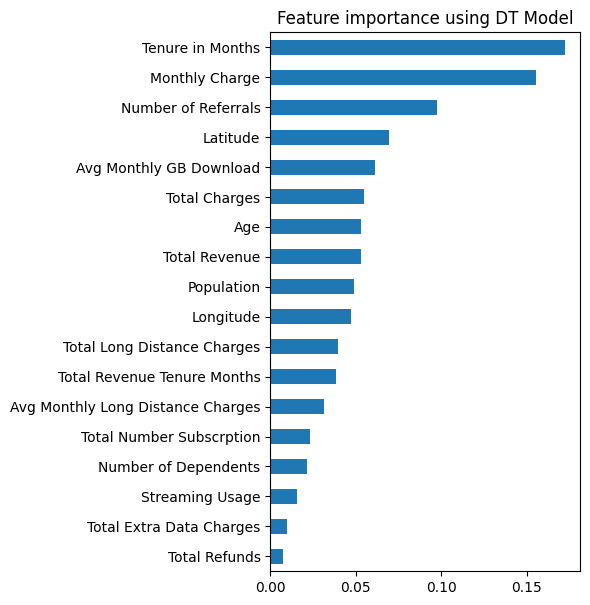

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


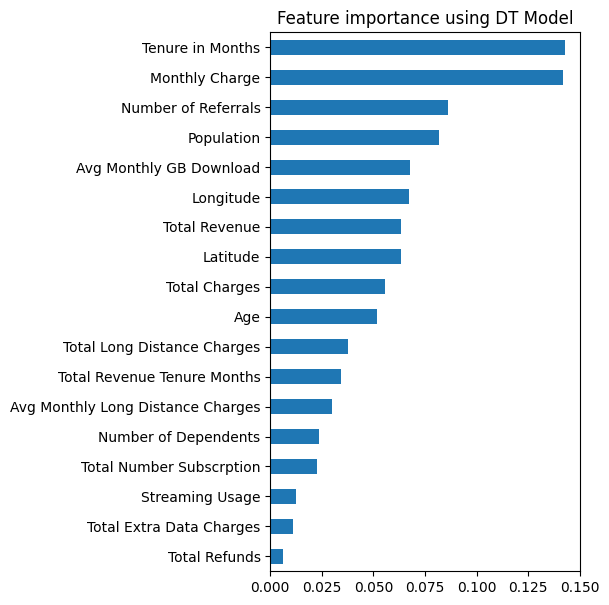

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


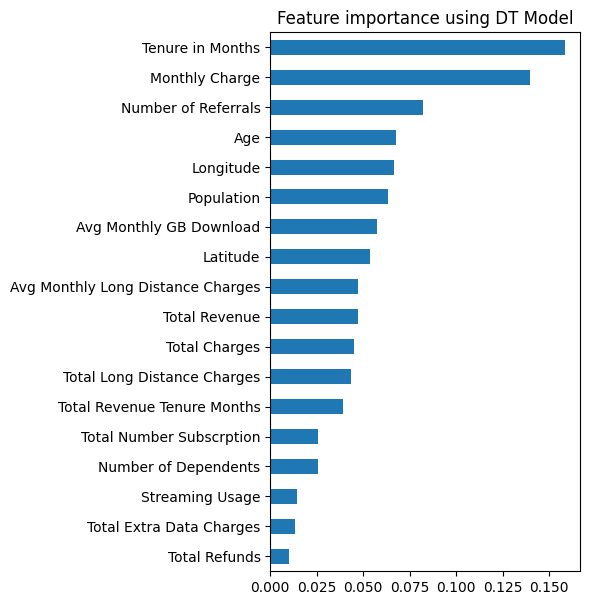

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


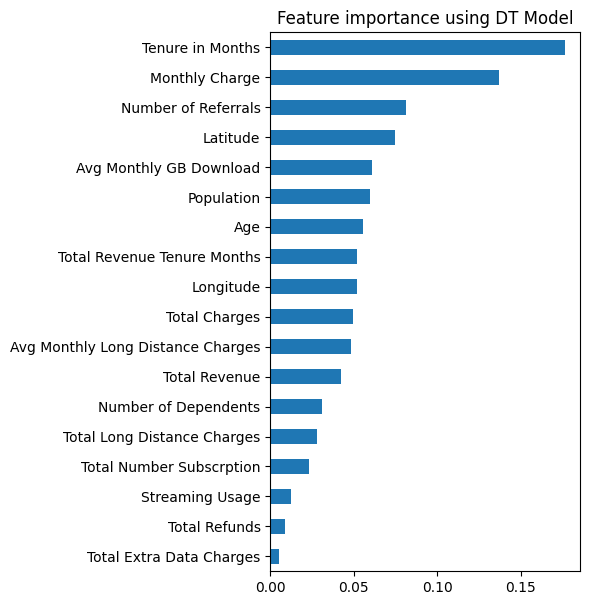

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


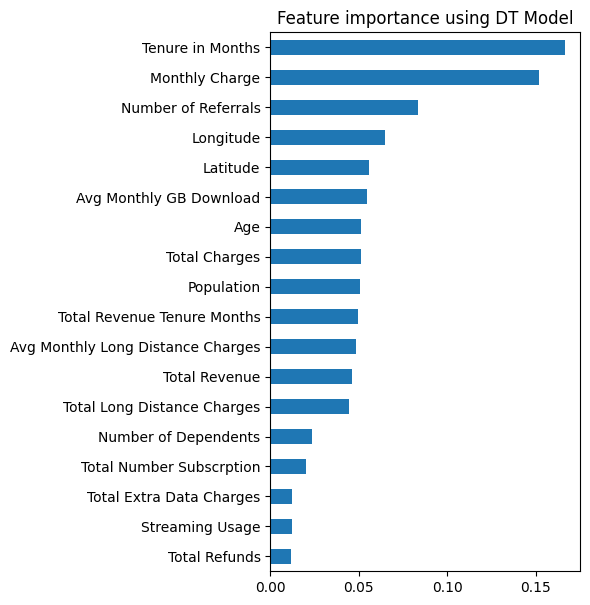

In [151]:
select_best_features_dt(X, y)

In [152]:
X = X.drop(['Latitude','Total Charges', 'Total Revenue', 'Total Long Distance Charges', 'Total Number Subscrption', 'Total Revenue Tenure Months', 'Streaming Usage'], axis = 1)

In [153]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Count                              7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Dependents                         7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Longitude                          7043 non-null   float64
 8   Population                         7043 non-null   int64  
 9   Referred a Friend                  7043 non-null   int64  
 10  Number of Referrals                7043 non-null   int64  
 11  Tenure in Months                   7043 non-nu

In [154]:
#apply RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

In [155]:
#apply Lasso
from sklearn.linear_model import LassoCV
def apply_lasso(X_train, y_train):
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    plot_importance(coef,'Lasso')

In [156]:
def select_best_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        
        
        
        X_train_numeric = X_train.select_dtypes(include=[np.number])
        X_train_numeric = X_train_numeric.drop(['Count', 'Zip Code', 'Referred a Friend', 'Multiple Lines','Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data'], axis = 1)

        scaler = MinMaxScaler().fit(X_train_numeric)
        X_train_scaled = scaler.transform(X_train_numeric)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_numeric.columns)
    
        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')
        
        # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)
        
        # check which features to use using lasso
        print('')
        print('----------------- LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)
            
        # check which features to use using DT
        print('')
        print('----------------- DT ----------------------')
        apply_dt(X_train_scaled, y_train)
            
        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                                   True
Number of Dependents                  True
Longitude                            False
Population                           False
Number of Referrals                   True
Tenure in Months                      True
Avg Monthly Long Distance Charges    False
Avg Monthly GB Download              False
Monthly Charge                        True
Total Refunds                        False
Total Extra Data Charges             False
dtype: bool

----------------- LASSO ----------------------


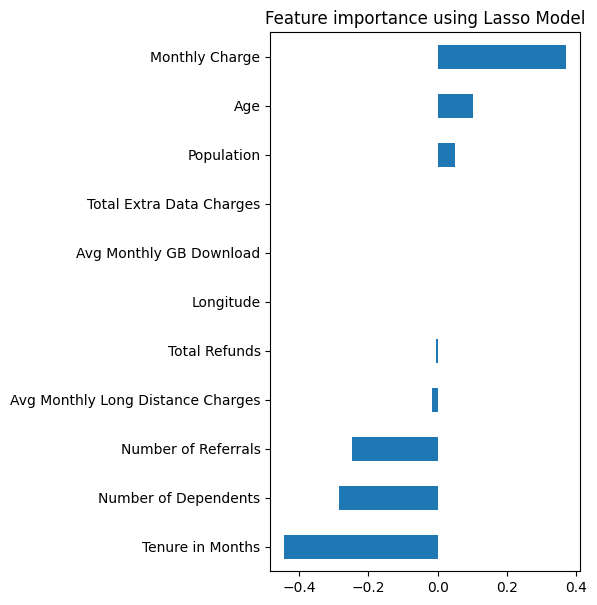


----------------- DT ----------------------


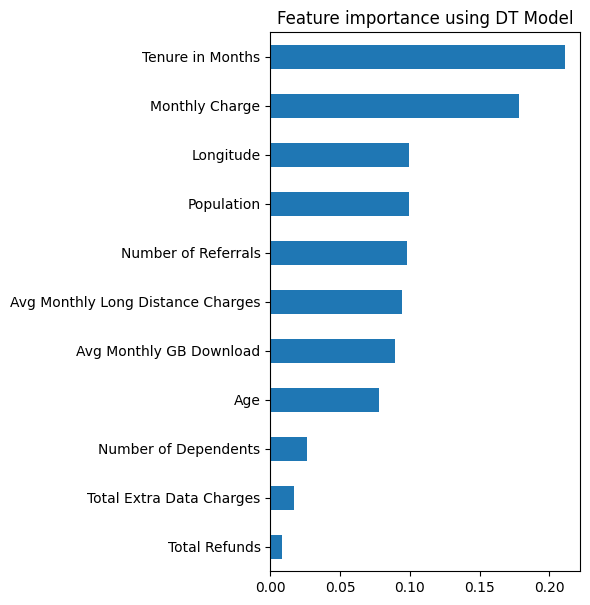

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                                  False
Number of Dependents                  True
Longitude                            False
Population                            True
Number of Referrals                   True
Tenure in Months                      True
Avg Monthly Long Distance Charges    False
Avg Monthly GB Download              False
Monthly Charge                        True
Total Refunds                        False
Total Extra Data Charges             False
dtype: bool

----------------- LASSO ----------------------


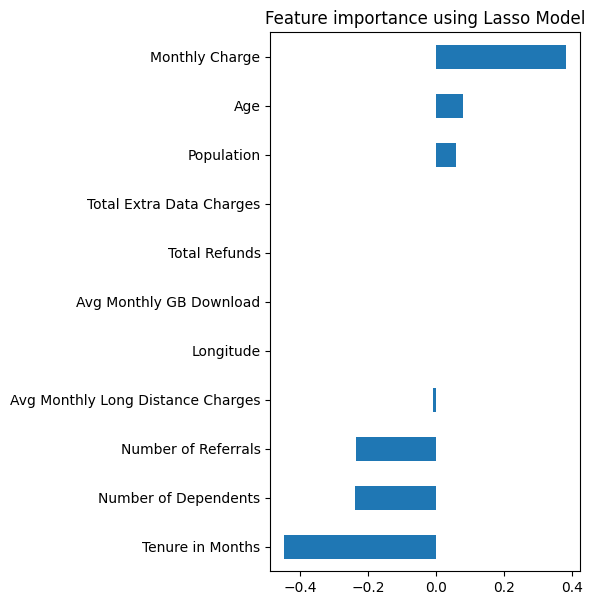


----------------- DT ----------------------


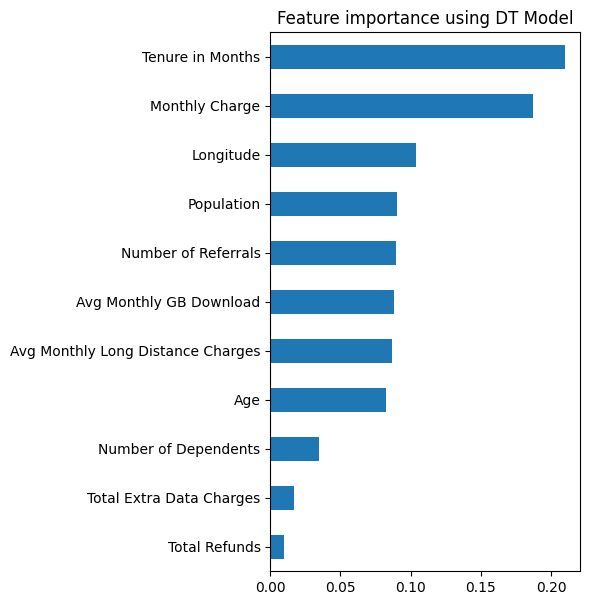

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                                   True
Number of Dependents                  True
Longitude                            False
Population                           False
Number of Referrals                   True
Tenure in Months                      True
Avg Monthly Long Distance Charges    False
Avg Monthly GB Download              False
Monthly Charge                        True
Total Refunds                        False
Total Extra Data Charges             False
dtype: bool

----------------- LASSO ----------------------


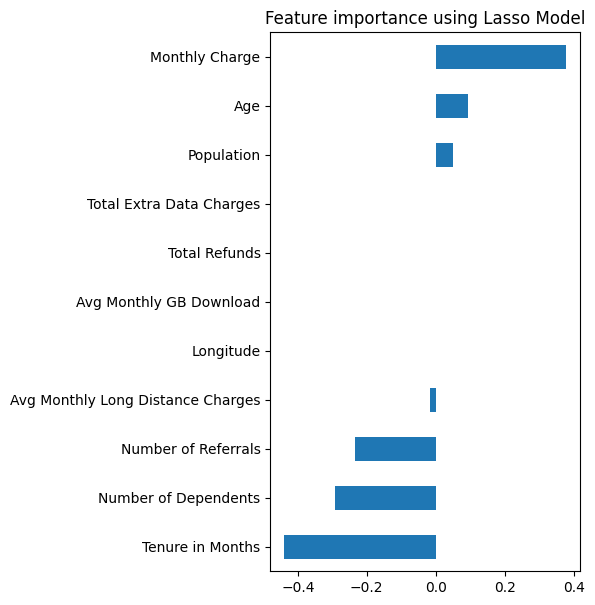


----------------- DT ----------------------


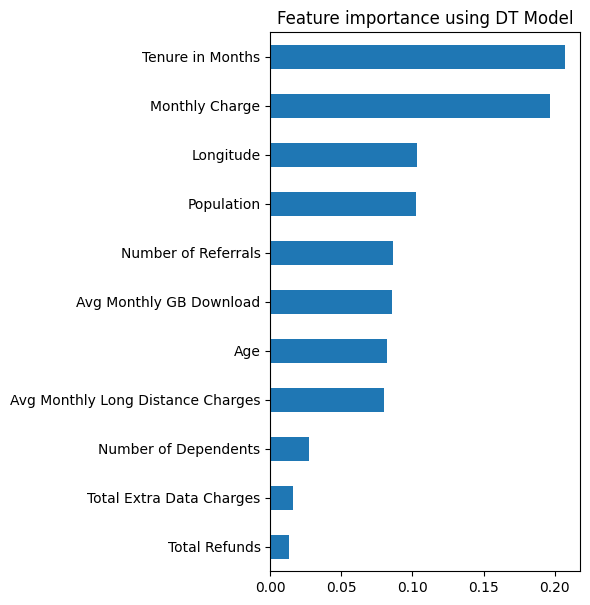

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                                   True
Number of Dependents                  True
Longitude                            False
Population                           False
Number of Referrals                   True
Tenure in Months                      True
Avg Monthly Long Distance Charges    False
Avg Monthly GB Download              False
Monthly Charge                        True
Total Refunds                        False
Total Extra Data Charges             False
dtype: bool

----------------- LASSO ----------------------


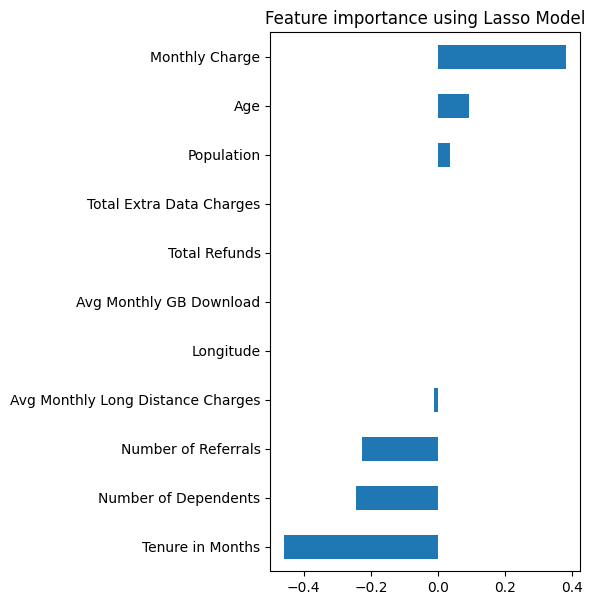


----------------- DT ----------------------


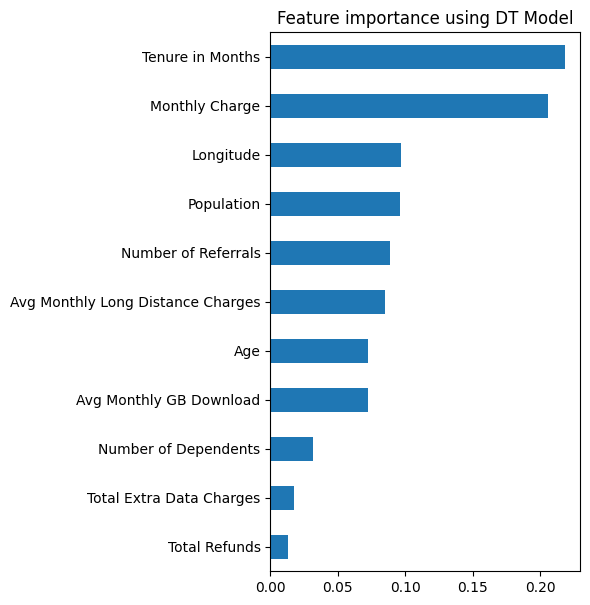

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Age                                  False
Number of Dependents                  True
Longitude                            False
Population                            True
Number of Referrals                   True
Tenure in Months                      True
Avg Monthly Long Distance Charges    False
Avg Monthly GB Download              False
Monthly Charge                        True
Total Refunds                        False
Total Extra Data Charges             False
dtype: bool

----------------- LASSO ----------------------


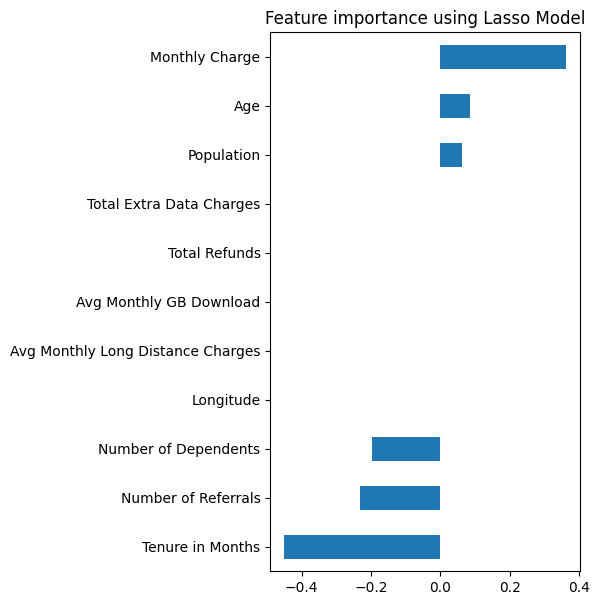


----------------- DT ----------------------


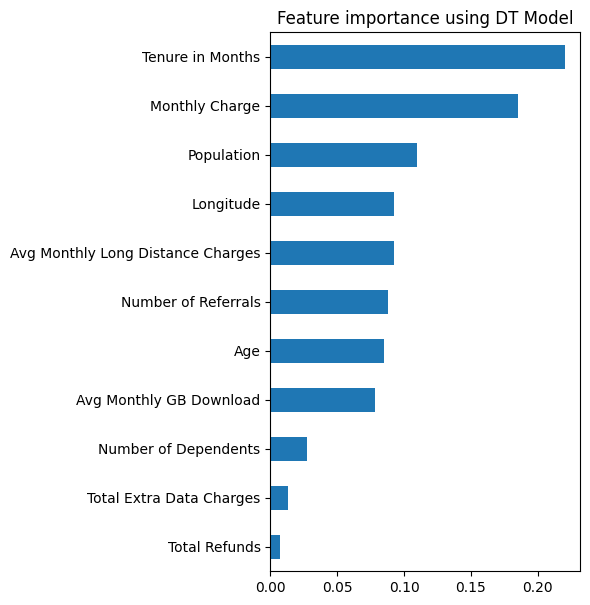

In [157]:
select_best_features(X,y)

In [158]:
X = X.drop(['Longitude','Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Total Refunds','Total Extra Data Charges' ], axis = 1)


In [159]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Count                   7043 non-null   int64  
 1   Age                     7043 non-null   int64  
 2   Married                 7043 non-null   object 
 3   Dependents              7043 non-null   object 
 4   Number of Dependents    7043 non-null   int64  
 5   City                    7043 non-null   object 
 6   Zip Code                7043 non-null   int64  
 7   Population              7043 non-null   int64  
 8   Referred a Friend       7043 non-null   int64  
 9   Number of Referrals     7043 non-null   int64  
 10  Tenure in Months        7043 non-null   int64  
 11  Offer                   7043 non-null   object 
 12  Multiple Lines          7043 non-null   int64  
 13  Internet Service        7043 non-null   int64  
 14  Internet Type           7043 n

In [160]:
dflimpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Count                              7043 non-null   int64  
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   Zip Code                           7043 non-null   int64  
 8   Latitude                           7043 non-null   float64
 9   Longitude                          7043 non-null   float64
 10  Population                         7043 non-null   int64  
 11  Churn Value                        7043 non-nu

Model building

In [161]:
binary_variables = ['Married', 'Paperless Billing']
dflimpo[binary_variables] = dflimpo[binary_variables].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [162]:
#testing two data sets, with 'Age' and 'Population' and without these two variables 
df_keep = dflimpo[['Age', 'Population','Married', 'Offer', 'Internet Type', 'Multiple Lines','Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Tenure in Months', 'Monthly Charge','Number of Dependents', 'Number of Referrals', 'Churn Value']].copy()


In [163]:
df_keep1 = dflimpo[['Married', 'Offer', 'Internet Type', 'Multiple Lines','Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Tenure in Months', 'Monthly Charge','Number of Dependents', 'Number of Referrals', 'Churn Value']].copy()

In [164]:
df_keep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     7043 non-null   int64  
 1   Population              7043 non-null   int64  
 2   Married                 7043 non-null   int64  
 3   Offer                   7043 non-null   object 
 4   Internet Type           7043 non-null   object 
 5   Multiple Lines          7043 non-null   int64  
 6   Online Security         7043 non-null   int64  
 7   Online Backup           7043 non-null   int64  
 8   Device Protection Plan  7043 non-null   int64  
 9   Premium Tech Support    7043 non-null   int64  
 10  Streaming TV            7043 non-null   int64  
 11  Streaming Movies        7043 non-null   int64  
 12  Streaming Music         7043 non-null   int64  
 13  Unlimited Data          7043 non-null   int64  
 14  Contract                7043 n

In [165]:
df_keep1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 6082-GLJIX
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Married                 7043 non-null   int64  
 1   Offer                   7043 non-null   object 
 2   Internet Type           7043 non-null   object 
 3   Multiple Lines          7043 non-null   int64  
 4   Online Security         7043 non-null   int64  
 5   Online Backup           7043 non-null   int64  
 6   Device Protection Plan  7043 non-null   int64  
 7   Premium Tech Support    7043 non-null   int64  
 8   Streaming TV            7043 non-null   int64  
 9   Streaming Movies        7043 non-null   int64  
 10  Streaming Music         7043 non-null   int64  
 11  Unlimited Data          7043 non-null   int64  
 12  Contract                7043 non-null   object 
 13  Paperless Billing       7043 non-null   int64  
 14  Payment Method          7043 n

In [166]:
df_keep

,Age,Population,Married,Offer,Internet Type,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Tenure in Months,Monthly Charge,Number of Dependents,Number of Referrals,Churn Value
Customer ID,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,78,68701,0,None,DSL,0,0,0,1,0,...,0,0,Month-to-Month,1,Bank Withdrawal,1,39.65,0,0,1
4737-AQCPU,39,68701,1,None,DSL,1,1,1,1,1,...,0,1,Two Year,0,Credit Card,72,72.10,0,5,0
5043-TRZWM,32,68701,0,None,Fiber Optic,0,0,0,1,0,...,0,1,Month-to-Month,0,Bank Withdrawal,1,75.55,0,0,0
8165-CBKXO,35,68701,1,None,Cable,0,0,1,1,0,...,1,1,Two Year,1,Credit Card,66,56.75,3,4,0
9979-RGMZT,20,68701,0,Offer E,Fiber Optic,0,0,1,0,0,...,1,1,One Year,1,Credit Card,7,94.05,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108-EJFJP,21,699,1,Offer E,DSL,0,1,1,0,0,...,1,1,Month-to-Month,1,Credit Card,1,53.55,0,6,0
0795-GMVQO,36,73006,1,None,Fiber Optic,1,1,1,1,0,...,1,1,One Year,0,Credit Card,67,109.90,0,1,0
9547-ITEFG,32,73006,1,Offer E,Fiber Optic,1,0,1,1,0,...,1,1,Month-to-Month,1,Credit Card,9,102.60,3,8,0


In [167]:
df_keep['Married'].value_counts()

Married
0    3641
1    3402
Name: count, dtype: int64

In [168]:
df_keep['Offer'].value_counts()

Offer
None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64

In [169]:
df_keep['Internet Type'].value_counts()

Internet Type
Fiber Optic    3035
DSL            1652
No             1526
Cable           830
Name: count, dtype: int64

In [170]:
df_keep['Contract'].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [171]:
df_keep['Paperless Billing'].value_counts()

Paperless Billing
1    4171
0    2872
Name: count, dtype: int64

In [172]:
df_keep['Payment Method'].value_counts()

Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

In [173]:
################################################# MODELS ##################################################
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

################################################# METRICS #################################################
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

################################### MODEL SELECTION & OPTIMIZATION ########################################
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

######################################### DECISION TREES PLOTS ############################################
# in anaconda prompt: conda install python-graphviz
#!pip install pydotplus
from sklearn.tree import export_graphviz
%pip install graphviz
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\JPP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\JPP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [174]:


def transform_data(X_train, X_2nd_df = False, X_2nd_df_flag = False):
    
    ########################################## CREATE DUMMIES #################################################    
    # Create dummies
    X_train_dummies = pd.get_dummies(X_train)
   
   
    ############################################ SCALE DATA ###################################################    
    # Create dummies 
    scaler = MinMaxScaler().fit(X_train_dummies)
    X_train_scaled = scaler.transform(X_train_dummies)
    X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train_dummies.columns)
    
    if X_2nd_df_flag == True:
        
        ########################################## CREATE DUMMIES #############################################
        X_2nd_df_dummies = pd.get_dummies(X_2nd_df)
       
        
        # If we don't have all the values in the validation dataset that we have in the train, that column will not be created
        # We should assure that all columns in train are also present in validation
        # Get missing columns from the training dataset
        missing_cols = set(X_train_dummies.columns ) - set(X_2nd_df_dummies.columns )
        # Add a missing column in test set with default value equal to 0
        for c in missing_cols:
            X_2nd_df_dummies[c] = 0
        # Ensure the order of column in the test set is in the same order than in train set
        X_2nd_df_dummies = X_2nd_df_dummies[X_train_dummies.columns]
        
        if 'Churn Value' in X_2nd_df_dummies.columns:
            X_2nd_df_dummies.drop(['Churn Value'], axis=1, inplace=True)
        else:
            pass
        
        ############################################ SCALE DATA ###################################################    
        X_2nd_df_scaled = scaler.transform(X_2nd_df_dummies) # Scaling with 'scaler' from train data
        X_2nd_df_scaled = pd.DataFrame(X_2nd_df_scaled , columns = X_2nd_df_dummies.columns, index = X_2nd_df_dummies.index )
        
   
    if X_2nd_df_flag == False:
        return X_train_scaled
    else:
        return X_train_scaled, X_2nd_df_scaled

def select_best_models(dflimpo, model):
    # Split test set 
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        dflimpo.drop(['Churn Value'], axis=1),
        dflimpo['Churn Value'],
        test_size=0.15,
        random_state=99,
        stratify=dflimpo['Churn Value']
    )

    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)
    score_train, score_val = [], []

    for train_index, val_index in skf.split(X_train_val, y_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        X_train, X_val = transform_data(X_train, X_val, X_2nd_df_flag=True)

        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train), 3)
    avg_val = round(np.mean(score_val), 3)
    std_train = round(np.std(score_train), 2)
    std_val = round(np.std(score_val), 2)

    return avg_train, std_train, avg_val, std_val

def show_results(df1, dflimpo, *args):
    count = 0
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(dflimpo, arg)
        df1.iloc[count] = f"{avg_train}+/-{std_train}", f"{avg_val}+/-{std_val}"
        count += 1
    return df1

# Models
model_LR = LogisticRegression()
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(max_depth=3, random_state=99)
model_NN = MLPClassifier(max_iter=2000, random_state=99)

#Results dfkeep (with 'Age' and 'Population')

dfkeep = pd.DataFrame(columns=['Train', 'Validation'], index=['Logistic Regression', 'KNN', 'DT', 'NN'])


show_results(dfkeep, df_keep, model_LR, model_KNN, model_DT, model_NN)


In [ ]:
#Results dfkeep1 (without 'Age' and 'Population')
dfkeep1 = pd.DataFrame(columns=['Train', 'Validation'], index=['Logistic Regression', 'KNN', 'DT', 'NN'])

show_results(dfkeep1, df_keep1, model_LR, model_KNN, model_DT, model_NN)

,Train,Validation
Logistic Regression,0.675+/-0.01,0.67+/-0.02
KNN,0.726+/-0.01,0.623+/-0.01
DT,0.616+/-0.01,0.61+/-0.03
NN,0.847+/-0.01,0.642+/-0.01


In [ ]:
def point_plot(train, validation, values_try):
    x = values_try
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

Optimization of KNN

In [182]:
#apply KNN 
def get_models_knn(dflimpo, values):
    models = dict()
    results_train, results_val = [],[]
    
    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = KNeighborsClassifier(n_neighbors = value)
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(dflimpo, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        #names.append(name)
        
    #print(names)
    print(results_train)
    print(results_val)
        
        
    return results_train, results_val #, names

[0.726, 0.688, 0.678, 0.678, 0.675, 0.675, 0.67, 0.669, 0.667, 0.663, 0.658, 0.657, 0.656]
[0.46, 0.549, 0.582, 0.603, 0.617, 0.619, 0.627, 0.63, 0.628, 0.629, 0.633, 0.634, 0.633]


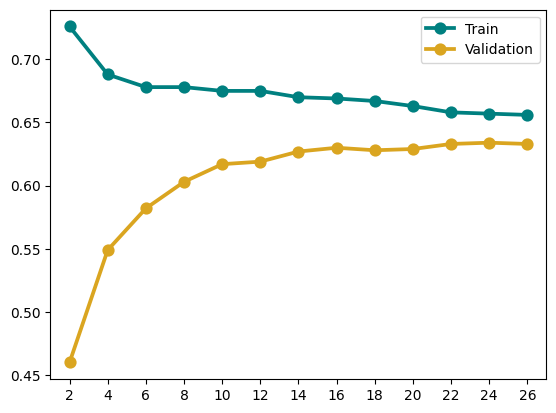

In [183]:
values_try = [2,4,6,8,10,12,14,16,18,20,22,24,26]
results_train, results_val = get_models_knn(df_keep, values_try)
point_plot(results_train, results_val, values_try)

[1.0, 0.77, 0.724, 0.708, 0.693, 0.691, 0.687, 0.681, 0.675, 0.674, 0.67, 0.664, 0.662]
[0.546, 0.593, 0.617, 0.627, 0.631, 0.635, 0.636, 0.64, 0.638, 0.643, 0.641, 0.638, 0.636]


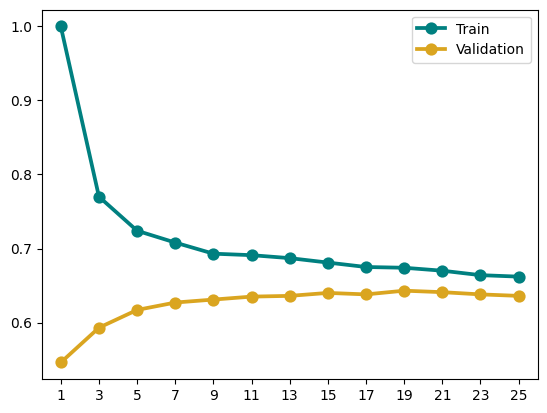

In [184]:
values_try = [1,3,5,7,9,11,13,15,17,19,21,23,25]
results_train, results_val = get_models_knn(df_keep, values_try)
point_plot(results_train, results_val, values_try)

[1.0, 0.726, 0.77, 0.688, 0.724, 0.678, 0.708, 0.678, 0.693, 0.675, 0.691, 0.675, 0.687, 0.67, 0.681, 0.669, 0.675]
[0.546, 0.46, 0.593, 0.549, 0.617, 0.582, 0.627, 0.603, 0.631, 0.617, 0.635, 0.619, 0.636, 0.627, 0.64, 0.63, 0.638]


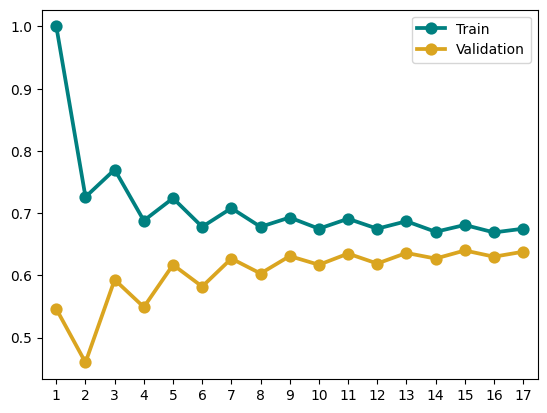

In [185]:
values_try = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
results_train, results_val = get_models_knn(df_keep, values_try)
point_plot(results_train, results_val, values_try)

In [186]:
final_model_knn = KNeighborsClassifier(n_neighbors = 9)

Optimization of DT

In [187]:
#apply DT
def get_models_dt(dflimpo, values):
    models = dict()
    results_train, results_val = [],[]
    
    # create the instances of each model with different values
    for value in values:
        models['depth_' + str(value)] = DecisionTreeClassifier(max_depth = value, random_state = 99)
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(dflimpo, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        
    return results_train, results_val

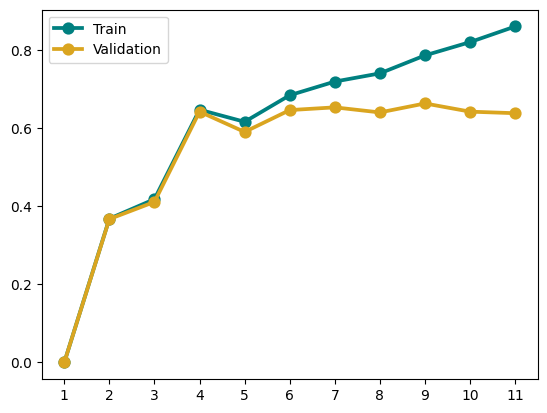

In [188]:
values_try = [1,2,3,4,5,6,7,8,9,10,11]
results_train, results_val = get_models_dt(df_keep, values_try)
point_plot(results_train, results_val, values_try)

In [189]:
final_model_dt = DecisionTreeClassifier(max_depth = 5, random_state = 99)

In [190]:
data = df_keep.copy()

X = data.drop(['Churn Value'], axis = 1)
y = data['Churn Value'].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99, stratify = y)
X_train, X_val = transform_data(X_train, X_val, X_2nd_df_flag = True)

In [191]:
def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train.columns,
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

In [192]:
dt_visual = DecisionTreeClassifier(max_depth = 5, random_state = 99).fit(X_train, y_train)

In [193]:
#plot_tree(dt_visual)

Optimization of NN

In [194]:
#apply NN
def get_models_nn(dflimpo, values):
    models = dict()
    results_train, results_val, names = [],[],[]
    
    # create the instances of each model with different values
    for value in values:
        models[str(value)] = MLPClassifier(hidden_layer_sizes = value, max_iter = 2000, random_state = 99)
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(dflimpo, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

In [195]:
#values_try = [(100),(150),(200),(100,100),(300),(150,150),(350),(400)]
#results_train, results_val, names = get_models_nn(df_keep, values_try)
#point_plot(results_train, results_val, names)

In [196]:
#values_try = [(10),(20),(30),(40),(50),(60),(70),(80),(90)]
#results_train, results_val, names = get_models_nn(df_keep, values_try)
#point_plot(results_train, results_val, names)

In [197]:
#values_try = [(2),(4),(6),(8),(10),(12)]
#results_train, results_val, names = get_models_nn(df_keep, values_try)
#point_plot(results_train, results_val, names)

In [198]:
#values_try = [(5),(6),(7),(8),(9)]
#results_train, results_val, names = get_models_nn(df_keep, values_try)
#point_plot(results_train, results_val, names)

In [199]:
data = df_keep.copy()

X_data = data.drop(['Churn Value'], axis = 1)
y_data = data['Churn Value'].copy()

X_data = transform_data(X_train = X_data, X_2nd_df_flag = False)

Random Search for NN

In [200]:
nn = MLPClassifier(max_iter = 2000, random_state = 99)

In [201]:
parameter_space_random = {
    'hidden_layer_sizes': [(2),(4),(5),(8),(10),(20),(40), (100)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['logistic','relu']
}

In [202]:
random_search = RandomizedSearchCV(nn, param_distributions=parameter_space_random, 
                                   scoring = 'f1', cv=5, random_state = 42)

In [203]:
random_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'sgd', 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 4, 'activation': 'relu'}
Best Score:  0.6791791024882837


Grid Search for NN

In [204]:
parameter_space_grid = {
    'hidden_layer_sizes': [(4)],
    'learning_rate_init': [0.1, 0.05, 0.15],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['relu','logistic']
}

In [205]:
grid_search = GridSearchCV(nn, parameter_space_grid, scoring = 'f1', return_train_score = True, cv = 5)

In [206]:
grid_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'logistic', 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.15, 'solver': 'sgd'}
Best Score:  0.6851668664760011


In [207]:
final_model_nn = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (4), 
                               learning_rate = 'adaptive', learning_rate_init = 0.15, 
                               solver = 'sgd', max_iter = 2000, random_state = 42)

Optimization of LR model

O melhor valor para 'C' é: 1


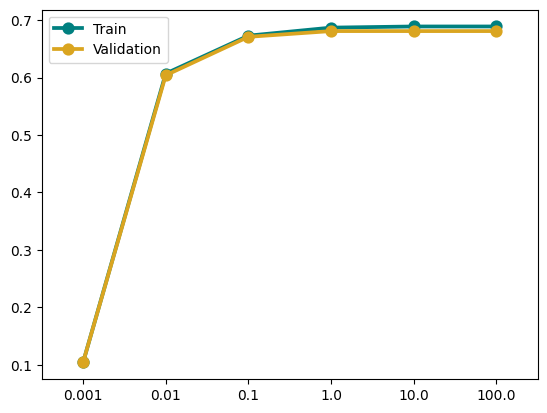

In [208]:


def get_models_logreg(dflimpo, values):
    models = dict()
    results_train, results_val = [], []
    
    # create the instances of each model with different values
    for value in values:
        models['C_' + str(value)] = LogisticRegression(C=value, random_state=99, solver='liblinear')
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(dflimpo, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        
    return results_train, results_val

# Set the values to be attempted for the 'C' parameter in Logistic Regression
values_try_logreg = [0.001, 0.01, 0.1, 1, 10, 100]

# Retrieve the optimization results for Logistic Regression
results_train_logreg, results_val_logreg = get_models_logreg(df_keep, values_try_logreg)

# Create a chart or another form of visualization to compare the results
point_plot(results_train_logreg, results_val_logreg, values_try_logreg)

# Determine the best value for 'C' based on the results
best_C = values_try_logreg[results_val_logreg.index(max(results_val_logreg))]

print(f"O melhor valor para 'C' é: {best_C}")




In [209]:
final_model_lr = LogisticRegression(C=1, random_state=99, solver='liblinear')

Wrap up

In [210]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best LR','Best KNN','Best DT', 'Best NN' ])
show_results(df_final_models, df_keep, final_model_lr, final_model_knn, final_model_dt, final_model_nn)

,Train,Validation
Best LR,0.687+/-0.0,0.681+/-0.02
Best KNN,0.693+/-0.0,0.631+/-0.02
Best DT,0.616+/-0.03,0.59+/-0.03
Best NN,0.697+/-0.0,0.68+/-0.02


In [211]:
data = df_keep.copy()

X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [212]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, 
                                                  train_size = 0.8, 
                                                  random_state = 99, 
                                                  stratify = y_data)

In [213]:
X_train, X_val = transform_data(X_train, X_val, X_2nd_df_flag = True)

model_lr = final_model_lr.fit(X_train, y_train)
model_knn = final_model_knn.fit(X_train, y_train)
model_dt = final_model_dt.fit(X_train, y_train)
model_nn = final_model_nn.fit(X_train, y_train)


In [214]:
prob_modelLR = model_lr.predict_proba(X_val)
prob_modelKNN = model_knn.predict_proba(X_val)
prob_modelDT =  model_dt.predict_proba(X_val)
prob_modelNN =  model_nn.predict_proba(X_val)

In [215]:
fpr_modelLR, tpr_modelLR, thresholds_modelLR = roc_curve(y_true = y_val, y_score = prob_modelLR[:,1])
fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val, y_score = prob_modelKNN[:,1])
fpr_modelDT, tpr_modelDT, thresholds_modelDT = roc_curve(y_val, prob_modelDT[:,1])
fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val, prob_modelNN[:,1])

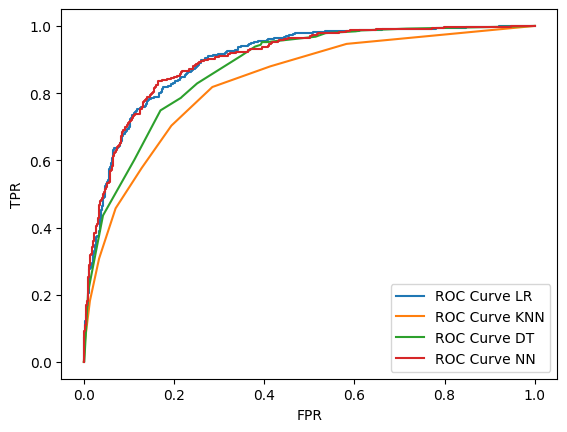

In [216]:
plt.plot(fpr_modelLR, tpr_modelLR,label="ROC Curve LR")
plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
plt.plot(fpr_modelDT, tpr_modelDT, label="ROC Curve DT")
plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

Final Model

In [217]:
final_model = final_model_nn.fit(X_train, y_train)

In [218]:
predict_proba = final_model.predict_proba(X_val)
predict_proba

array([[0.29996596, 0.70003404],
       [0.95114823, 0.04885177],
       [0.12035972, 0.87964028],
       ...,
       [0.46965007, 0.53034993],
       [0.59848186, 0.40151814],
       [0.27203756, 0.72796244]])

Best Threshold=0.324076, F-Score=0.730


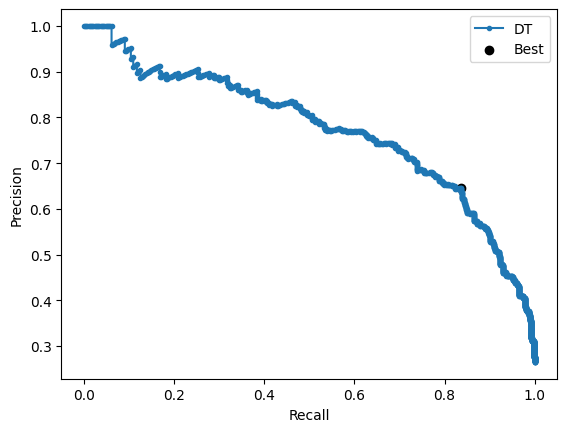

In [219]:
precision, recall, thresholds = precision_recall_curve(y_val, predict_proba[:,1])

# apply f1 score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

plt.plot(recall, precision, marker='.', label='DT')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Application of the best model NN on test set

In [220]:


def select_best_models(dflimpo, model):
    try:
        # Split the dataset into training and testing sets."






        X_train_val, X_test, y_train_val, y_test = train_test_split(
            dflimpo.drop(['Churn Value'], axis=1),
            dflimpo['Churn Value'],
            test_size=0.15,
            random_state=99,
            stratify=dflimpo['Churn Value']
        )

        # Transform the datasets, if necessary






        X_train_val_transformed, X_test_transformed = transform_data(X_train_val, X_test, X_2nd_df_flag=True)

        # Trai the modelo
        model.fit(X_train_val_transformed, y_train_val)

        # Make predictions
        predict_proba_test = model.predict_proba(X_test_transformed)

        # Apply a limit to the probabilities 
        limiar = 0.324076
        final_pred = [1 if value >= limiar else 0 for value in predict_proba_test[:, 1]]

        print("Results:")
        print("  Final Predictions:", final_pred)
        print("  True Labels (y_test):", y_test.values)
        print("  Predicted Probabilities:")
        print(predict_proba_test)

        # Calculate  F1 Score
        f1 = f1_score(y_test, final_pred)
        print("F1 Score:", f1)

        return y_test.values, final_pred, predict_proba_test, f1
    except Exception as e:
        print("Error:", e)
        return None


y_test, final_pred, predict_proba_test, f1 = select_best_models(df_keep, final_model)







Results:
  Final Predictions: [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 